In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Loading data
SC = pd.read_csv('C:/Users/User/Desktop/seungchon_2016-2023.csv', encoding='cp949')
JS = pd.read_csv('C:/Users/User/Desktop/juksan_2016-2023.csv', encoding='cp949')

In [14]:
# function 1
def my_level(x) :
    if x <= 1 :
        return "Very good"
    elif 1 < x <= 2 :
        return "Good"
    elif 2 < x <= 3 :
        return "Slightly good"
    elif 3 < x <= 5 :
        return "Normal"
    elif 5 < x <= 8 :
        return "Slightly bad"
    elif 8 < x <= 10 :
        return "Bad"
    else :
        return "Very bad"

In [25]:
# function 2 (recommend)
def my_level(x) :
    if x <= 3 :
        return "Good"
    elif 3 < x <= 5 :
        return "Normal"
    else :
        return "Bad"

In [26]:
SC["level"] = SC["BOD"].apply(lambda x : my_level(x))
JS["level"] = JS["BOD"].apply(lambda x : my_level(x))

In [27]:
SC.head()

,Year,Month,Date,Spot,Time,BOD,COD,TN,TP,TOC,...,DO,EC,Chla,WT,WL,WS,RF,TI,TD,level
0,2016,1,2016.01.04,광산,0,2.3,4.9,5.535,0.081,4.5,...,11.8,406,16.9,7.7,7.51,8.990,0.0000,14.850,15.070,Good
1,2016,1,2016.01.11,광산,7,2.9,5.5,6.618,0.161,5.1,...,12.7,416,36.9,7.5,7.50,8.971,0.0000,14.735,15.174,Good
2,2016,1,2016.01.18,광산,14,2.9,6.0,7.880,0.140,5.8,...,13.6,462,38.9,7.0,7.51,8.990,3.7453,15.356,15.136,Good
3,2016,1,2016.01.28,광산,24,2.4,5.0,7.099,0.114,5.7,...,13.1,385,21.2,4.2,7.62,9.216,7.3612,19.858,17.458,Good
4,2016,2,2016.02.02,광산,29,4.2,6.5,4.747,0.232,5.6,...,11.3,371,13.3,4.2,7.55,9.066,0.0000,22.615,23.610,Normal


In [28]:
JS.head()

,Year,Month,Data,Spot,Time,BOD,COD,TN,TP,TOC,...,DO,EC,Chla,WT,WL,WS,RF,TI,TD,level
0,2016,1,2016.01.04,죽산,0,4.1,6.1,4.476,0.092,4.7,...,15.6,348,86.9,6.8,3.51,25.750,0.0000,23.338,23.338,Normal
1,2016,1,2016.01.11,죽산,7,3.6,6.4,4.520,0.092,6.1,...,14.2,345,114.7,5.8,3.48,25.575,0.0000,20.703,23.488,Normal
2,2016,1,2016.01.18,죽산,14,4.1,7.1,5.105,0.075,6.8,...,17.0,379,112.9,5.3,3.53,25.882,3.8457,22.312,20.022,Normal
3,2016,1,2016.01.28,죽산,24,4.9,8.2,5.698,0.113,7.7,...,15.8,376,116.6,3.2,3.54,25.948,9.4872,29.833,25.522,Normal
4,2016,2,2016.02.02,죽산,29,2.9,5.9,5.458,0.146,5.3,...,14.1,408,32.6,3.4,3.53,25.882,0.0000,41.374,45.953,Good


In [29]:
SC_train = SC.loc[SC['Year']!=2023]
SC_test = SC.loc[SC['Year']==2023]
SC_train_variables = SC_train.iloc[:,5:25].drop(labels="level", axis=1)
SC_train_level = SC_train.iloc[:,5:25].iloc[:,-1]
SC_test_variables = SC_test.iloc[:,5:25].drop(labels="level", axis=1)
SC_test_level = SC_test.iloc[:,5:25].iloc[:,-1]

In [30]:
JS_train = JS.loc[JS['Year']!=2023]
JS_test = JS.loc[JS['Year']==2023]
JS_train_variables = JS_train.iloc[:,5:25].drop(labels="level", axis=1)
JS_train_level = JS_train.iloc[:,5:25].iloc[:,-1]
JS_test_variables = JS_test.iloc[:,5:25].drop(labels="level", axis=1)
JS_test_level = JS_test.iloc[:,5:25].iloc[:,-1]

In [9]:
### Sampling for imbalanced data
!pip install -U imbalanced-learn

In [10]:
from sklearn.datasets import make_classification
from collections import Counter

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

In [12]:
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours 
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek

In [47]:
import scipy as sc
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from imblearn.under_sampling import *

n0 = 200; n1 = 20
rv1 = sc.stats.multivariate_normal([-1, 0], [[1, 0], [0, 1]])
rv2 = sc.stats.multivariate_normal([+1, 0], [[1, 0], [0, 1]])
X0 = rv1.rvs(n0, random_state=0)
X1 = rv2.rvs(n1, random_state=0)
X_imb = np.vstack([X0, X1])
y_imb = np.hstack([np.zeros(n0), np.ones(n1)])

x1min = -4; x1max = 4
x2min = -2; x2max = 2
xx1 = np.linspace(x1min, x1max, 1000)
xx2 = np.linspace(x2min, x2max, 1000)
X1, X2 = np.meshgrid(xx1, xx2)

def classification_result2(X, y, title=""):
    plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    model = SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
    Y = np.reshape(model.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', label="class 0")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label="class 1")
    plt.contour(X1, X2, Y, colors='k', levels=[0.5])
    y_pred = model.predict(X)
    plt.xlim(-4, 4)
    plt.ylim(-3, 3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    return model

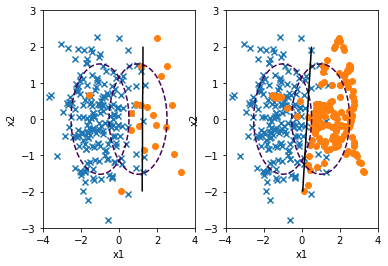

In [48]:
# SMOTE
X_samp, y_samp = SMOTE(random_state=5790).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.savefig('SMOTE.png')

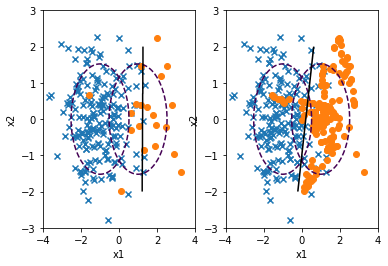

In [49]:
# ADASYN
X_samp, y_samp = ADASYN(random_state=5790).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.savefig('ADASYN.png')

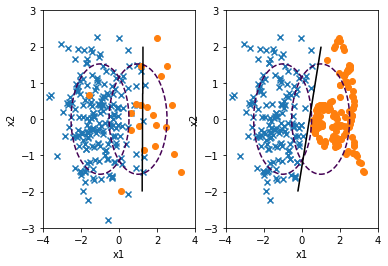

In [50]:
# SMOTE-ENN
X_samp, y_samp = SMOTEENN(random_state=5790).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.savefig('SMOTE-ENN.png')

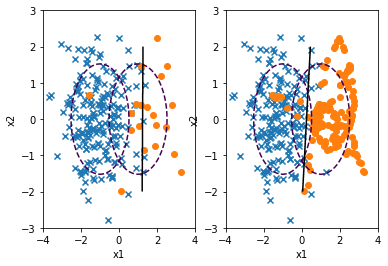

In [51]:
# SMOTE-Tomek
X_samp, y_samp = SMOTETomek(random_state=5790).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.savefig('SMOTE-Tomek.png')

In [31]:
### Making training data with sampling techniques for imbalanced data
## Seungchon
Counter(SC_train_level)

Counter({'Good': 22, 'Normal': 141, 'Bad': 190})

In [32]:
Counter(SC_test_level)

Counter({'Bad': 29, 'Normal': 11, 'Good': 5})

In [35]:
SC_train_x = SC_train_variables.drop(labels="Chla", axis=1)
SC_train_y = SC_train_variables.iloc[:,-7]
SC_test_x = SC_test_variables.drop(labels="Chla", axis=1)
SC_test_y = SC_test_variables.iloc[:,-7]

In [36]:
# SMOTE
sm_sample = SMOTE(random_state=5790) 
SC_train_variables_sm, SC_train_level_sm = sm_sample.fit_resample(SC_train_variables, SC_train_level)

In [37]:
Counter(SC_train_level_sm)

Counter({'Good': 190, 'Normal': 190, 'Bad': 190})

In [38]:
SC_train_x_sm = SC_train_variables_sm.drop(labels="Chla", axis=1)
SC_train_y_sm = SC_train_variables_sm.iloc[:,-7]

In [39]:
# ADASYN
ads_sample = ADASYN(random_state=5790) 
SC_train_variables_ads, SC_train_level_ads = ads_sample.fit_resample(SC_train_variables, SC_train_level)

In [40]:
Counter(SC_train_level_ads)

Counter({'Good': 182, 'Normal': 175, 'Bad': 190})

In [41]:
SC_train_x_ads = SC_train_variables_ads.drop(labels="Chla", axis=1)
SC_train_y_ads = SC_train_variables_ads.iloc[:,-7]

In [42]:
# SMOTE-ENN
sme_sample = SMOTEENN(random_state=5790) 
SC_train_variables_sme, SC_train_level_sme = sme_sample.fit_resample(SC_train_variables, SC_train_level)

In [43]:
Counter(SC_train_level_sme)

Counter({'Bad': 72, 'Good': 170, 'Normal': 60})

In [44]:
SC_train_x_sme = SC_train_variables_sme.drop(labels="Chla", axis=1)
SC_train_y_sme = SC_train_variables_sme.iloc[:,-7]

In [45]:
# SMOTE-Tomek
smt_sample = SMOTETomek(random_state=5790) 
SC_train_variables_smt, SC_train_level_smt = smt_sample.fit_resample(SC_train_variables, SC_train_level)

In [46]:
Counter(SC_train_level_smt)

Counter({'Good': 186, 'Normal': 172, 'Bad': 174})

In [47]:
SC_train_x_smt = SC_train_variables_smt.drop(labels="Chla", axis=1)
SC_train_y_smt = SC_train_variables_smt.iloc[:,-7]

In [33]:
## Juksan
Counter(JS_train_level)

Counter({'Normal': 180, 'Good': 54, 'Bad': 120})

In [34]:
Counter(JS_test_level)

Counter({'Bad': 20, 'Normal': 18, 'Good': 7})

In [48]:
JS_train_x = JS_train_variables.drop(labels="Chla", axis=1)
JS_train_y = JS_train_variables.iloc[:,-7]
JS_test_x = JS_test_variables.drop(labels="Chla", axis=1)
JS_test_y = JS_test_variables.iloc[:,-7]

In [49]:
# SMOTE
sm_sample = SMOTE(random_state=5790) 
JS_train_variables_sm, JS_train_level_sm = sm_sample.fit_resample(JS_train_variables, JS_train_level)

In [50]:
Counter(JS_train_level_sm)

Counter({'Normal': 180, 'Good': 180, 'Bad': 180})

In [51]:
JS_train_x_sm = JS_train_variables_sm.drop(labels="Chla", axis=1)
JS_train_y_sm = JS_train_variables_sm.iloc[:,-7]

In [52]:
# ADASYN
ads_sample = ADASYN(random_state=5790) 
JS_train_variables_ads, JS_train_level_ads = ads_sample.fit_resample(JS_train_variables, JS_train_level)

In [53]:
Counter(JS_train_level_ads)

Counter({'Normal': 180, 'Good': 183, 'Bad': 183})

In [54]:
JS_train_x_ads = JS_train_variables_ads.drop(labels="Chla", axis=1)
JS_train_y_ads = JS_train_variables_ads.iloc[:,-7]

In [55]:
# SMOTE-ENN
sme_sample = SMOTEENN(random_state=5790) 
JS_train_variables_sme, JS_train_level_sme = sme_sample.fit_resample(JS_train_variables, JS_train_level)

In [56]:
Counter(JS_train_level_sme)

Counter({'Bad': 72, 'Good': 128, 'Normal': 22})

In [57]:
JS_train_x_sme = JS_train_variables_sme.drop(labels="Chla", axis=1)
JS_train_y_sme = JS_train_variables_sme.iloc[:,-7]

In [58]:
# SMOTE-Tomek
smt_sample = SMOTETomek(random_state=5790) 
JS_train_variables_smt, JS_train_level_smt = smt_sample.fit_resample(JS_train_variables, JS_train_level)

In [59]:
Counter(JS_train_level_smt)

Counter({'Normal': 158, 'Good': 171, 'Bad': 159})

In [60]:
JS_train_x_smt = JS_train_variables_smt.drop(labels="Chla", axis=1)
JS_train_y_smt = JS_train_variables_smt.iloc[:,-7]

In [61]:
### DNN, CNN
# Install tensorflow first! (important!!)
!pip install tensorflow 

In [62]:
!pip install Keras

In [63]:
import tensorflow as tf

In [64]:
from tensorflow.keras import layers  #모듈(변수나 함수를 포함)만 불러오기
from sklearn.preprocessing import StandardScaler, MinMaxScaler  #표준 정규화, 최대-최소 정규화
from keras.layers import Dropout

In [65]:
## DNN model (SC)
# model
model = tf.keras.Sequential()  
model.add(layers.Dense(64, input_shape=(18,)))  
model.add(layers.Activation('relu'))  
model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))
model.add(layers.Dense(16))         
model.add(layers.Activation('relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1))
model.add(layers.Activation('linear')) 

model.compile(
        loss='mse',         # mean_squared_error(평균제곱오차)의 alias
        optimizer='adam',   # 최적화 기법 중 하나
        metrics=["mean_squared_error","mean_absolute_error"])    # 실험 후 관찰하고 싶은 metric 들을 나열함. 

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1216      
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 activation_2 (Activation)   (None, 16)                0         
                                                                 
 dropout (Dropout)           (None, 16)                0

In [67]:
# Original
hist = model.fit(
    SC_train_x, SC_train_y,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
9/9 - 1s - loss: 4689.1235 - mean_squared_error: 4689.1235 - mean_absolute_error: 57.8351 - val_loss: 1563.7677 - val_mean_squared_error: 1563.7677 - val_mean_absolute_error: 30.9040 - 546ms/epoch - 61ms/step
Epoch 2/100
9/9 - 0s - loss: 1839.8446 - mean_squared_error: 1839.8446 - mean_absolute_error: 29.1643 - val_loss: 1686.9982 - val_mean_squared_error: 1686.9982 - val_mean_absolute_error: 30.3574 - 25ms/epoch - 3ms/step
Epoch 3/100
9/9 - 0s - loss: 2003.0179 - mean_squared_error: 2003.0179 - mean_absolute_error: 29.6003 - val_loss: 1653.6404 - val_mean_squared_error: 1653.6404 - val_mean_absolute_error: 29.9764 - 23ms/epoch - 3ms/step
Epoch 4/100
9/9 - 0s - loss: 1725.7036 - mean_squared_error: 1725.7036 - mean_absolute_error: 28.4549 - val_loss: 1432.1768 - val_mean_squared_error: 1432.1768 - val_mean_absolute_error: 27.8018 - 22ms/epoch - 2ms/step
Epoch 5/100
9/9 - 0s - loss: 1700.2579 - mean_squared_error: 1700.2579 - mean_absolute_error: 29.5711 - val_loss: 1423.554

Epoch 39/100
9/9 - 0s - loss: 1347.8195 - mean_squared_error: 1347.8195 - mean_absolute_error: 26.0362 - val_loss: 986.9703 - val_mean_squared_error: 986.9703 - val_mean_absolute_error: 24.0537 - 21ms/epoch - 2ms/step
Epoch 40/100
9/9 - 0s - loss: 1217.1975 - mean_squared_error: 1217.1975 - mean_absolute_error: 23.9607 - val_loss: 979.3749 - val_mean_squared_error: 979.3749 - val_mean_absolute_error: 24.4680 - 20ms/epoch - 2ms/step
Epoch 41/100
9/9 - 0s - loss: 1236.2844 - mean_squared_error: 1236.2844 - mean_absolute_error: 25.3665 - val_loss: 961.0473 - val_mean_squared_error: 961.0473 - val_mean_absolute_error: 24.2973 - 21ms/epoch - 2ms/step
Epoch 42/100
9/9 - 0s - loss: 1182.5133 - mean_squared_error: 1182.5133 - mean_absolute_error: 24.3262 - val_loss: 943.8633 - val_mean_squared_error: 943.8633 - val_mean_absolute_error: 23.8749 - 22ms/epoch - 2ms/step
Epoch 43/100
9/9 - 0s - loss: 1186.7039 - mean_squared_error: 1186.7039 - mean_absolute_error: 23.7158 - val_loss: 955.3968 - va

Epoch 77/100
9/9 - 0s - loss: 919.3914 - mean_squared_error: 919.3914 - mean_absolute_error: 22.6261 - val_loss: 711.9702 - val_mean_squared_error: 711.9702 - val_mean_absolute_error: 19.7085 - 22ms/epoch - 2ms/step
Epoch 78/100
9/9 - 0s - loss: 826.1345 - mean_squared_error: 826.1345 - mean_absolute_error: 21.3077 - val_loss: 997.2296 - val_mean_squared_error: 997.2296 - val_mean_absolute_error: 25.6236 - 21ms/epoch - 2ms/step
Epoch 79/100
9/9 - 0s - loss: 972.4915 - mean_squared_error: 972.4915 - mean_absolute_error: 22.9655 - val_loss: 707.0396 - val_mean_squared_error: 707.0396 - val_mean_absolute_error: 19.6712 - 20ms/epoch - 2ms/step
Epoch 80/100
9/9 - 0s - loss: 877.1776 - mean_squared_error: 877.1776 - mean_absolute_error: 20.9594 - val_loss: 847.4398 - val_mean_squared_error: 847.4398 - val_mean_absolute_error: 23.0390 - 22ms/epoch - 2ms/step
Epoch 81/100
9/9 - 0s - loss: 862.5275 - mean_squared_error: 862.5275 - mean_absolute_error: 21.2490 - val_loss: 705.9608 - val_mean_squ

In [68]:
scores = model.evaluate(SC_test_x, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 726.9169 - mean_squared_error: 726.9170 - mean_absolute_error: 21.1215
test_loss:  726.9169311523438
test_mae:  726.9169921875


In [69]:
SC_test_y_pred_DNN = model.predict(SC_test_x)
SC_test_y_pred_DNN

2/2 [==============================] - 0s 2ms/step


array([[ 53.21828  ],
       [ 75.606186 ],
       [ 53.60049  ],
       [ 56.373466 ],
       [ 80.19933  ],
       [ 61.684563 ],
       [ 64.145996 ],
       [ 71.91146  ],
       [ 47.75111  ],
       [ 70.31132  ],
       [ 67.11071  ],
       [ 90.16582  ],
       [ 25.879328 ],
       [103.43551  ],
       [ 69.206825 ],
       [ 13.051206 ],
       [ 93.282364 ],
       [ 80.686844 ],
       [ 69.369545 ],
       [ 11.295181 ],
       [ 22.636244 ],
       [ 11.920197 ],
       [ 16.047213 ],
       [  6.6158476],
       [ 92.62736  ],
       [ 33.99729  ],
       [ 81.62134  ],
       [ 61.364258 ],
       [ 14.576116 ],
       [ 32.17212  ],
       [ 82.22942  ],
       [  8.265324 ],
       [ 21.118332 ],
       [ 46.4685   ],
       [ 79.065865 ],
       [ 88.442245 ],
       [ 96.71372  ],
       [ 99.53646  ],
       [ 39.855507 ],
       [ 89.28966  ],
       [ 36.263447 ],
       [ 67.48961  ],
       [ 66.68069  ],
       [ 58.3741   ],
       [ 35.1062   ]], dtype=flo

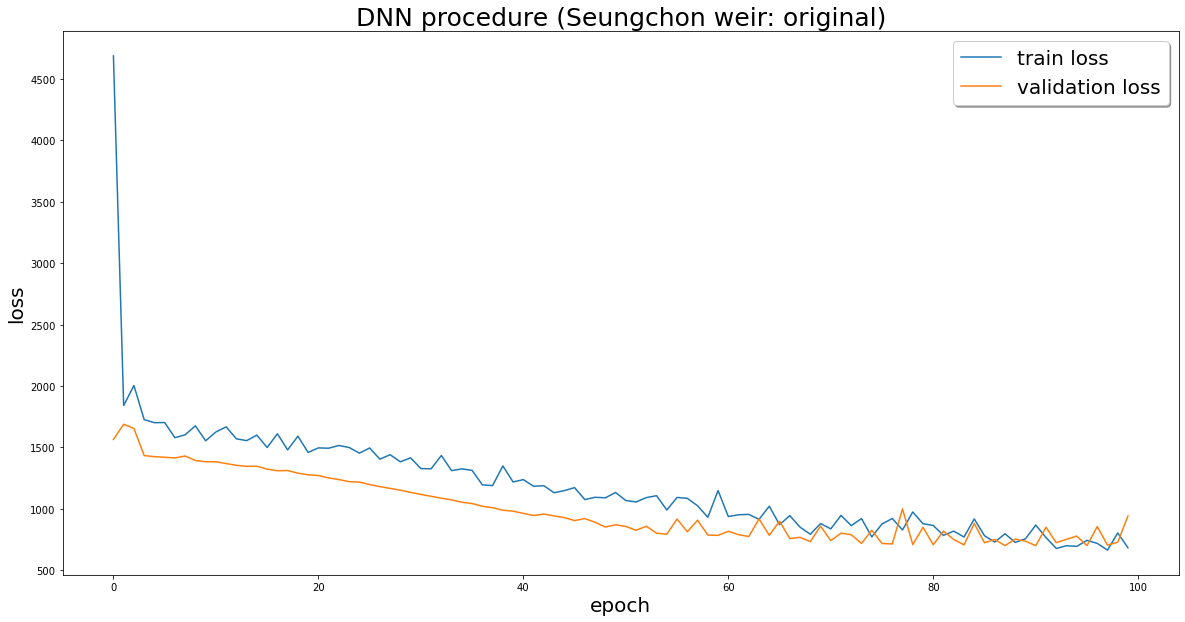

In [70]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Seungchon weir: original)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN SC_python.png')

In [71]:
# SMOTE
hist = model.fit(
    SC_train_x_sm, SC_train_y_sm,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
15/15 - 0s - loss: 644.3671 - mean_squared_error: 644.3671 - mean_absolute_error: 18.0718 - val_loss: 170.9967 - val_mean_squared_error: 170.9967 - val_mean_absolute_error: 10.4483 - 48ms/epoch - 3ms/step
Epoch 2/100
15/15 - 0s - loss: 627.5902 - mean_squared_error: 627.5902 - mean_absolute_error: 17.8172 - val_loss: 174.7533 - val_mean_squared_error: 174.7533 - val_mean_absolute_error: 10.4846 - 25ms/epoch - 2ms/step
Epoch 3/100
15/15 - 0s - loss: 623.3442 - mean_squared_error: 623.3442 - mean_absolute_error: 17.6322 - val_loss: 240.5218 - val_mean_squared_error: 240.5218 - val_mean_absolute_error: 12.4293 - 24ms/epoch - 2ms/step
Epoch 4/100
15/15 - 0s - loss: 648.6067 - mean_squared_error: 648.6067 - mean_absolute_error: 17.8843 - val_loss: 156.1442 - val_mean_squared_error: 156.1442 - val_mean_absolute_error: 9.8251 - 26ms/epoch - 2ms/step
Epoch 5/100
15/15 - 0s - loss: 629.4359 - mean_squared_error: 629.4359 - mean_absolute_error: 17.6636 - val_loss: 131.5870 - val_mean

Epoch 39/100
15/15 - 0s - loss: 558.2582 - mean_squared_error: 558.2582 - mean_absolute_error: 16.8255 - val_loss: 117.6763 - val_mean_squared_error: 117.6763 - val_mean_absolute_error: 8.2471 - 26ms/epoch - 2ms/step
Epoch 40/100
15/15 - 0s - loss: 625.3253 - mean_squared_error: 625.3253 - mean_absolute_error: 17.5936 - val_loss: 143.4421 - val_mean_squared_error: 143.4421 - val_mean_absolute_error: 9.0672 - 25ms/epoch - 2ms/step
Epoch 41/100
15/15 - 0s - loss: 563.8148 - mean_squared_error: 563.8148 - mean_absolute_error: 16.7959 - val_loss: 107.7189 - val_mean_squared_error: 107.7189 - val_mean_absolute_error: 7.8319 - 27ms/epoch - 2ms/step
Epoch 42/100
15/15 - 0s - loss: 647.8795 - mean_squared_error: 647.8795 - mean_absolute_error: 17.5803 - val_loss: 122.7959 - val_mean_squared_error: 122.7959 - val_mean_absolute_error: 8.5050 - 25ms/epoch - 2ms/step
Epoch 43/100
15/15 - 0s - loss: 656.9099 - mean_squared_error: 656.9099 - mean_absolute_error: 17.7242 - val_loss: 110.7628 - val_me

Epoch 77/100
15/15 - 0s - loss: 526.8819 - mean_squared_error: 526.8819 - mean_absolute_error: 16.4870 - val_loss: 127.0516 - val_mean_squared_error: 127.0516 - val_mean_absolute_error: 8.3200 - 24ms/epoch - 2ms/step
Epoch 78/100
15/15 - 0s - loss: 590.1629 - mean_squared_error: 590.1629 - mean_absolute_error: 16.4908 - val_loss: 162.6071 - val_mean_squared_error: 162.6071 - val_mean_absolute_error: 9.5170 - 25ms/epoch - 2ms/step
Epoch 79/100
15/15 - 0s - loss: 625.3591 - mean_squared_error: 625.3591 - mean_absolute_error: 17.4009 - val_loss: 112.1990 - val_mean_squared_error: 112.1990 - val_mean_absolute_error: 8.0118 - 24ms/epoch - 2ms/step
Epoch 80/100
15/15 - 0s - loss: 599.5288 - mean_squared_error: 599.5288 - mean_absolute_error: 16.8180 - val_loss: 131.0407 - val_mean_squared_error: 131.0407 - val_mean_absolute_error: 8.7192 - 24ms/epoch - 2ms/step
Epoch 81/100
15/15 - 0s - loss: 549.3182 - mean_squared_error: 549.3182 - mean_absolute_error: 16.4042 - val_loss: 152.6529 - val_me

In [72]:
scores = model.evaluate(SC_test_x, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 578.0989 - mean_squared_error: 578.0989 - mean_absolute_error: 18.7205
test_loss:  578.0989379882812
test_mae:  578.0989379882812


In [73]:
SC_test_y_pred_DNN_sm = model.predict(SC_test_x)
SC_test_y_pred_DNN_sm

2/2 [==============================] - 0s 1ms/step


array([[51.503674 ],
       [72.40346  ],
       [62.2115   ],
       [63.29311  ],
       [84.17822  ],
       [66.29911  ],
       [70.63685  ],
       [75.225845 ],
       [44.06362  ],
       [69.77151  ],
       [68.3359   ],
       [89.76121  ],
       [23.133635 ],
       [95.479256 ],
       [58.86708  ],
       [11.1056795],
       [92.60321  ],
       [64.95512  ],
       [54.081165 ],
       [22.153187 ],
       [15.07672  ],
       [ 7.576916 ],
       [ 7.814054 ],
       [ 1.1459529],
       [89.71541  ],
       [34.491264 ],
       [78.088234 ],
       [47.805786 ],
       [11.592887 ],
       [30.121748 ],
       [69.97046  ],
       [ 5.349281 ],
       [14.452559 ],
       [39.783226 ],
       [69.43896  ],
       [82.34237  ],
       [95.35319  ],
       [95.97381  ],
       [42.31846  ],
       [89.911865 ],
       [34.22759  ],
       [62.378086 ],
       [67.045845 ],
       [63.270584 ],
       [44.317604 ]], dtype=float32)

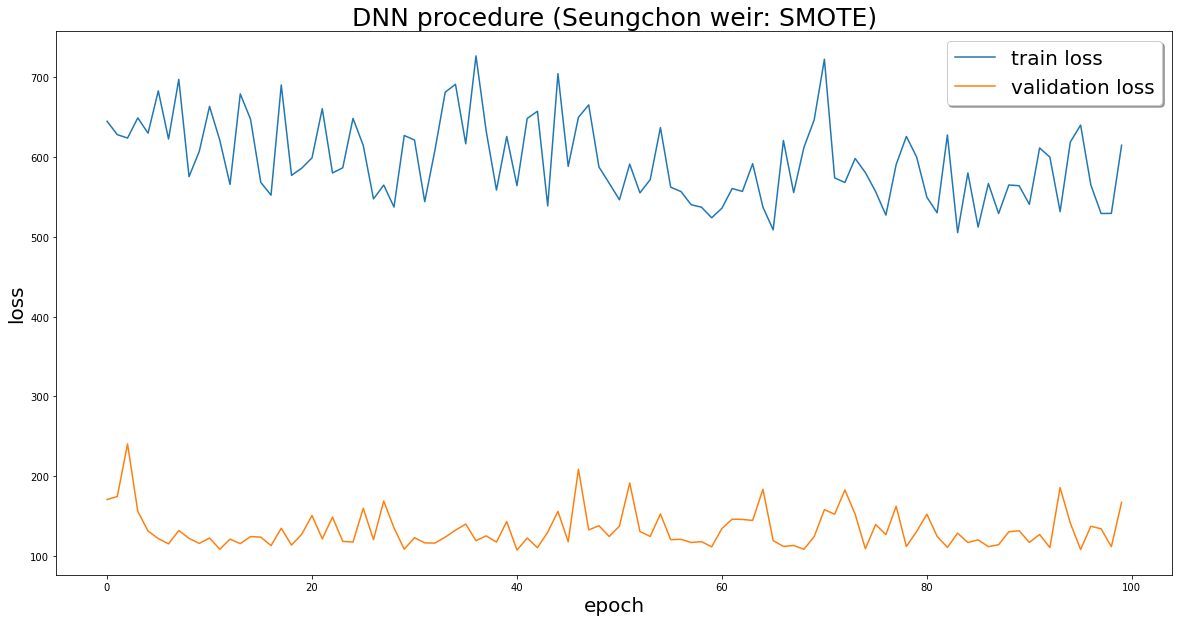

In [74]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Seungchon weir: SMOTE)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN SC_SMOTE_python.png')

In [75]:
# ADASYN
hist = model.fit(
    SC_train_x_ads, SC_train_y_ads,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
14/14 - 0s - loss: 623.7041 - mean_squared_error: 623.7041 - mean_absolute_error: 18.0678 - val_loss: 232.1731 - val_mean_squared_error: 232.1731 - val_mean_absolute_error: 11.5730 - 46ms/epoch - 3ms/step
Epoch 2/100
14/14 - 0s - loss: 646.9891 - mean_squared_error: 646.9891 - mean_absolute_error: 18.4595 - val_loss: 198.0811 - val_mean_squared_error: 198.0811 - val_mean_absolute_error: 10.4909 - 25ms/epoch - 2ms/step
Epoch 3/100
14/14 - 0s - loss: 785.1407 - mean_squared_error: 785.1407 - mean_absolute_error: 19.8934 - val_loss: 192.1573 - val_mean_squared_error: 192.1573 - val_mean_absolute_error: 9.5447 - 26ms/epoch - 2ms/step
Epoch 4/100
14/14 - 0s - loss: 576.7917 - mean_squared_error: 576.7917 - mean_absolute_error: 17.2176 - val_loss: 178.0077 - val_mean_squared_error: 178.0077 - val_mean_absolute_error: 9.3078 - 23ms/epoch - 2ms/step
Epoch 5/100
14/14 - 0s - loss: 575.0377 - mean_squared_error: 575.0377 - mean_absolute_error: 17.4241 - val_loss: 169.9734 - val_mean_

Epoch 39/100
14/14 - 0s - loss: 500.1015 - mean_squared_error: 500.1015 - mean_absolute_error: 16.3469 - val_loss: 138.4028 - val_mean_squared_error: 138.4028 - val_mean_absolute_error: 8.5447 - 25ms/epoch - 2ms/step
Epoch 40/100
14/14 - 0s - loss: 641.8591 - mean_squared_error: 641.8591 - mean_absolute_error: 17.8896 - val_loss: 153.5564 - val_mean_squared_error: 153.5564 - val_mean_absolute_error: 8.6120 - 24ms/epoch - 2ms/step
Epoch 41/100
14/14 - 0s - loss: 639.3501 - mean_squared_error: 639.3501 - mean_absolute_error: 18.3075 - val_loss: 162.2357 - val_mean_squared_error: 162.2357 - val_mean_absolute_error: 8.8058 - 24ms/epoch - 2ms/step
Epoch 42/100
14/14 - 0s - loss: 546.0467 - mean_squared_error: 546.0467 - mean_absolute_error: 17.0398 - val_loss: 143.0868 - val_mean_squared_error: 143.0868 - val_mean_absolute_error: 8.7275 - 24ms/epoch - 2ms/step
Epoch 43/100
14/14 - 0s - loss: 567.8652 - mean_squared_error: 567.8652 - mean_absolute_error: 16.7901 - val_loss: 137.1022 - val_me

Epoch 77/100
14/14 - 0s - loss: 652.5934 - mean_squared_error: 652.5934 - mean_absolute_error: 17.5749 - val_loss: 157.4943 - val_mean_squared_error: 157.4943 - val_mean_absolute_error: 8.6161 - 24ms/epoch - 2ms/step
Epoch 78/100
14/14 - 0s - loss: 547.8649 - mean_squared_error: 547.8649 - mean_absolute_error: 17.1821 - val_loss: 168.5038 - val_mean_squared_error: 168.5038 - val_mean_absolute_error: 9.8815 - 24ms/epoch - 2ms/step
Epoch 79/100
14/14 - 0s - loss: 513.7332 - mean_squared_error: 513.7332 - mean_absolute_error: 16.2017 - val_loss: 146.1971 - val_mean_squared_error: 146.1971 - val_mean_absolute_error: 9.0732 - 24ms/epoch - 2ms/step
Epoch 80/100
14/14 - 0s - loss: 536.0660 - mean_squared_error: 536.0660 - mean_absolute_error: 16.9011 - val_loss: 145.1263 - val_mean_squared_error: 145.1263 - val_mean_absolute_error: 8.5283 - 25ms/epoch - 2ms/step
Epoch 81/100
14/14 - 0s - loss: 565.3682 - mean_squared_error: 565.3682 - mean_absolute_error: 17.0570 - val_loss: 156.5569 - val_me

In [76]:
scores = model.evaluate(SC_test_x, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 315.3631 - mean_squared_error: 315.3632 - mean_absolute_error: 13.3301
test_loss:  315.3631286621094
test_mae:  315.3631591796875


In [77]:
SC_test_y_pred_DNN_ads = model.predict(SC_test_x)
SC_test_y_pred_DNN_ads

2/2 [==============================] - 0s 1000us/step


array([[39.171425 ],
       [60.943054 ],
       [52.152634 ],
       [51.94198  ],
       [69.02926  ],
       [56.28153  ],
       [59.652218 ],
       [62.57547  ],
       [32.96257  ],
       [57.509155 ],
       [57.158077 ],
       [78.26542  ],
       [16.984562 ],
       [78.99282  ],
       [49.10351  ],
       [ 7.6680903],
       [83.81089  ],
       [56.36241  ],
       [43.808987 ],
       [17.348522 ],
       [11.639314 ],
       [ 5.776652 ],
       [14.874441 ],
       [ 4.3868427],
       [79.68811  ],
       [32.962906 ],
       [77.23705  ],
       [43.255417 ],
       [ 6.8497424],
       [27.549007 ],
       [60.174007 ],
       [ 5.956919 ],
       [10.971863 ],
       [34.17419  ],
       [55.26037  ],
       [69.06524  ],
       [81.71676  ],
       [79.964386 ],
       [41.574326 ],
       [80.75105  ],
       [23.912155 ],
       [50.483852 ],
       [56.511185 ],
       [57.251625 ],
       [37.858677 ]], dtype=float32)

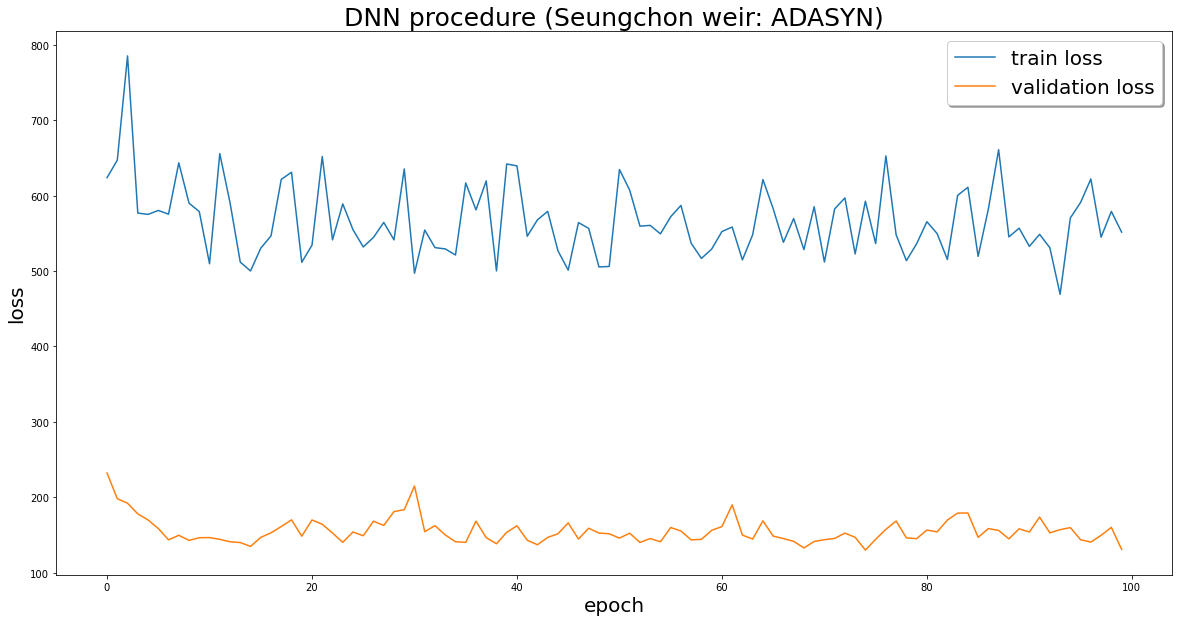

In [78]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Seungchon weir: ADASYN)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN SC_ADASYN_python.png')

In [79]:
# SMOTE-ENN
hist = model.fit(
    SC_train_x_sme, SC_train_y_sme,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
8/8 - 0s - loss: 375.1935 - mean_squared_error: 375.1935 - mean_absolute_error: 12.7089 - val_loss: 219.8281 - val_mean_squared_error: 219.8281 - val_mean_absolute_error: 11.8027 - 45ms/epoch - 6ms/step
Epoch 2/100
8/8 - 0s - loss: 325.6554 - mean_squared_error: 325.6554 - mean_absolute_error: 12.3809 - val_loss: 190.2340 - val_mean_squared_error: 190.2340 - val_mean_absolute_error: 10.7055 - 21ms/epoch - 3ms/step
Epoch 3/100
8/8 - 0s - loss: 460.0161 - mean_squared_error: 460.0161 - mean_absolute_error: 13.2074 - val_loss: 262.9647 - val_mean_squared_error: 262.9647 - val_mean_absolute_error: 12.9524 - 21ms/epoch - 3ms/step
Epoch 4/100
8/8 - 0s - loss: 465.8484 - mean_squared_error: 465.8484 - mean_absolute_error: 13.0474 - val_loss: 202.9310 - val_mean_squared_error: 202.9310 - val_mean_absolute_error: 11.2271 - 22ms/epoch - 3ms/step
Epoch 5/100
8/8 - 0s - loss: 407.1416 - mean_squared_error: 407.1416 - mean_absolute_error: 12.8218 - val_loss: 208.2151 - val_mean_squared_

Epoch 39/100
8/8 - 0s - loss: 308.3834 - mean_squared_error: 308.3834 - mean_absolute_error: 10.4121 - val_loss: 224.2682 - val_mean_squared_error: 224.2682 - val_mean_absolute_error: 11.8972 - 20ms/epoch - 2ms/step
Epoch 40/100
8/8 - 0s - loss: 426.2272 - mean_squared_error: 426.2272 - mean_absolute_error: 12.4797 - val_loss: 193.2226 - val_mean_squared_error: 193.2226 - val_mean_absolute_error: 10.7690 - 19ms/epoch - 2ms/step
Epoch 41/100
8/8 - 0s - loss: 298.7153 - mean_squared_error: 298.7153 - mean_absolute_error: 10.5814 - val_loss: 276.7153 - val_mean_squared_error: 276.7153 - val_mean_absolute_error: 13.2840 - 20ms/epoch - 3ms/step
Epoch 42/100
8/8 - 0s - loss: 341.7768 - mean_squared_error: 341.7768 - mean_absolute_error: 11.4818 - val_loss: 188.7239 - val_mean_squared_error: 188.7239 - val_mean_absolute_error: 10.5610 - 21ms/epoch - 3ms/step
Epoch 43/100
8/8 - 0s - loss: 297.3601 - mean_squared_error: 297.3601 - mean_absolute_error: 10.9227 - val_loss: 245.7946 - val_mean_squ

Epoch 77/100
8/8 - 0s - loss: 304.4888 - mean_squared_error: 304.4888 - mean_absolute_error: 10.5867 - val_loss: 211.3404 - val_mean_squared_error: 211.3404 - val_mean_absolute_error: 11.4745 - 21ms/epoch - 3ms/step
Epoch 78/100
8/8 - 0s - loss: 343.5090 - mean_squared_error: 343.5090 - mean_absolute_error: 10.6461 - val_loss: 211.9423 - val_mean_squared_error: 211.9423 - val_mean_absolute_error: 11.6165 - 20ms/epoch - 3ms/step
Epoch 79/100
8/8 - 0s - loss: 312.2532 - mean_squared_error: 312.2532 - mean_absolute_error: 10.3804 - val_loss: 213.3719 - val_mean_squared_error: 213.3719 - val_mean_absolute_error: 11.7288 - 22ms/epoch - 3ms/step
Epoch 80/100
8/8 - 0s - loss: 366.5050 - mean_squared_error: 366.5050 - mean_absolute_error: 11.1263 - val_loss: 190.9191 - val_mean_squared_error: 190.9191 - val_mean_absolute_error: 10.6537 - 20ms/epoch - 3ms/step
Epoch 81/100
8/8 - 0s - loss: 300.0599 - mean_squared_error: 300.0599 - mean_absolute_error: 10.4767 - val_loss: 215.8406 - val_mean_squ

In [80]:
scores = model.evaluate(SC_test_x, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 695.5969 - mean_squared_error: 695.5969 - mean_absolute_error: 21.7839
test_loss:  695.5968627929688
test_mae:  695.5968627929688


In [81]:
SC_test_y_pred_DNN_sme = model.predict(SC_test_x)
SC_test_y_pred_DNN_sme

2/2 [==============================] - 0s 999us/step


array([[ 51.606956 ],
       [ 73.13587  ],
       [ 67.18103  ],
       [ 68.80495  ],
       [ 93.25622  ],
       [ 74.08861  ],
       [ 80.49998  ],
       [ 86.54965  ],
       [ 41.81813  ],
       [ 77.0781   ],
       [ 76.71996  ],
       [102.85739  ],
       [ 30.550587 ],
       [ 82.83813  ],
       [ 64.15946  ],
       [ 21.504118 ],
       [100.662834 ],
       [ 67.27331  ],
       [ 56.742527 ],
       [ 40.812183 ],
       [ 17.263824 ],
       [  8.280173 ],
       [  6.2791386],
       [  1.1205539],
       [102.70018  ],
       [ 63.333282 ],
       [ 87.72405  ],
       [ 60.31354  ],
       [  7.7603025],
       [ 37.955112 ],
       [ 75.40293  ],
       [  6.3201113],
       [ 14.233503 ],
       [ 41.487686 ],
       [ 62.373714 ],
       [ 73.58839  ],
       [ 86.62534  ],
       [ 87.27177  ],
       [ 45.32997  ],
       [ 81.239685 ],
       [ 26.83647  ],
       [ 59.8881   ],
       [ 69.98992  ],
       [ 57.100975 ],
       [ 57.38645  ]], dtype=flo

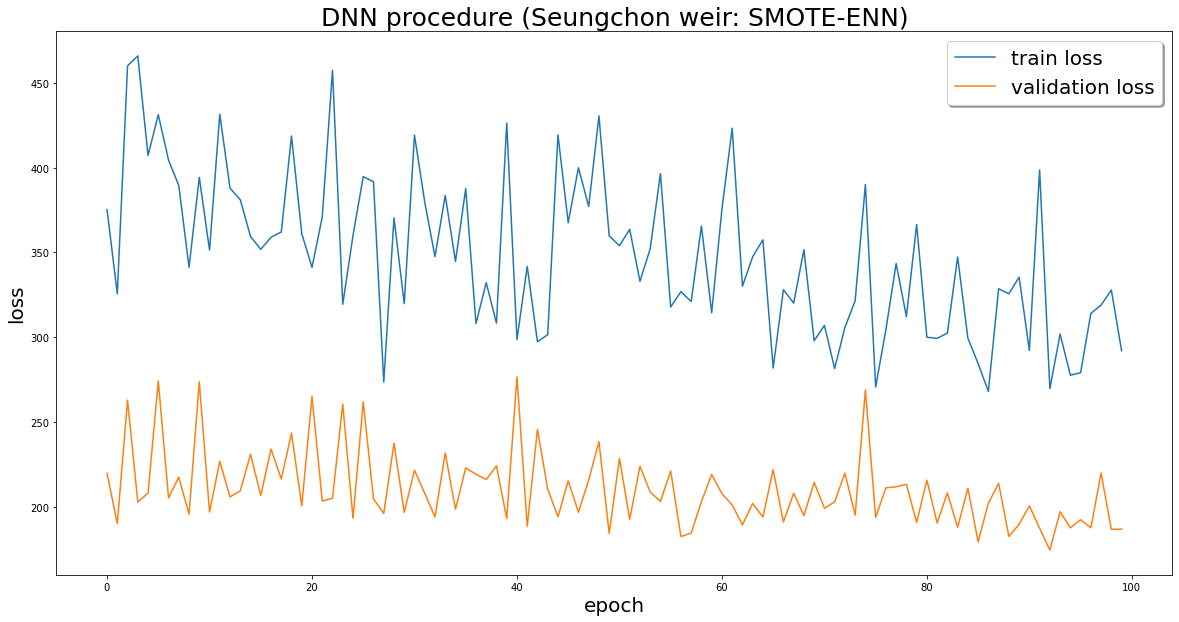

In [82]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Seungchon weir: SMOTE-ENN)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN SC_SMOTE-ENN_python.png')

In [83]:
# SMOTE-Tomek
hist = model.fit(
    SC_train_x_smt, SC_train_y_smt,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
14/14 - 0s - loss: 482.1075 - mean_squared_error: 482.1075 - mean_absolute_error: 15.5187 - val_loss: 111.0205 - val_mean_squared_error: 111.0205 - val_mean_absolute_error: 7.4901 - 46ms/epoch - 3ms/step
Epoch 2/100
14/14 - 0s - loss: 508.5334 - mean_squared_error: 508.5334 - mean_absolute_error: 15.4685 - val_loss: 123.6148 - val_mean_squared_error: 123.6148 - val_mean_absolute_error: 8.1299 - 23ms/epoch - 2ms/step
Epoch 3/100
14/14 - 0s - loss: 572.9916 - mean_squared_error: 572.9916 - mean_absolute_error: 16.0057 - val_loss: 110.0326 - val_mean_squared_error: 110.0326 - val_mean_absolute_error: 7.7552 - 24ms/epoch - 2ms/step
Epoch 4/100
14/14 - 0s - loss: 537.9706 - mean_squared_error: 537.9706 - mean_absolute_error: 15.5369 - val_loss: 112.9828 - val_mean_squared_error: 112.9828 - val_mean_absolute_error: 7.9255 - 24ms/epoch - 2ms/step
Epoch 5/100
14/14 - 0s - loss: 491.6922 - mean_squared_error: 491.6922 - mean_absolute_error: 15.5300 - val_loss: 106.2109 - val_mean_sq

Epoch 39/100
14/14 - 0s - loss: 473.4033 - mean_squared_error: 473.4033 - mean_absolute_error: 14.6394 - val_loss: 99.5923 - val_mean_squared_error: 99.5923 - val_mean_absolute_error: 7.5762 - 25ms/epoch - 2ms/step
Epoch 40/100
14/14 - 0s - loss: 467.1406 - mean_squared_error: 467.1406 - mean_absolute_error: 14.9967 - val_loss: 100.4846 - val_mean_squared_error: 100.4846 - val_mean_absolute_error: 7.5716 - 24ms/epoch - 2ms/step
Epoch 41/100
14/14 - 0s - loss: 407.1840 - mean_squared_error: 407.1840 - mean_absolute_error: 13.9873 - val_loss: 105.1945 - val_mean_squared_error: 105.1945 - val_mean_absolute_error: 7.6431 - 23ms/epoch - 2ms/step
Epoch 42/100
14/14 - 0s - loss: 459.1909 - mean_squared_error: 459.1909 - mean_absolute_error: 15.0049 - val_loss: 99.7944 - val_mean_squared_error: 99.7944 - val_mean_absolute_error: 7.4372 - 24ms/epoch - 2ms/step
Epoch 43/100
14/14 - 0s - loss: 475.7979 - mean_squared_error: 475.7979 - mean_absolute_error: 14.8993 - val_loss: 99.8608 - val_mean_sq

Epoch 77/100
14/14 - 0s - loss: 498.6709 - mean_squared_error: 498.6709 - mean_absolute_error: 15.0448 - val_loss: 86.5246 - val_mean_squared_error: 86.5246 - val_mean_absolute_error: 6.7792 - 24ms/epoch - 2ms/step
Epoch 78/100
14/14 - 0s - loss: 470.2974 - mean_squared_error: 470.2974 - mean_absolute_error: 14.7100 - val_loss: 107.8110 - val_mean_squared_error: 107.8110 - val_mean_absolute_error: 7.2724 - 23ms/epoch - 2ms/step
Epoch 79/100
14/14 - 0s - loss: 472.4941 - mean_squared_error: 472.4941 - mean_absolute_error: 15.0379 - val_loss: 141.8344 - val_mean_squared_error: 141.8344 - val_mean_absolute_error: 8.4750 - 24ms/epoch - 2ms/step
Epoch 80/100
14/14 - 0s - loss: 465.2198 - mean_squared_error: 465.2198 - mean_absolute_error: 14.9348 - val_loss: 99.6650 - val_mean_squared_error: 99.6650 - val_mean_absolute_error: 7.3722 - 23ms/epoch - 2ms/step
Epoch 81/100
14/14 - 0s - loss: 418.2169 - mean_squared_error: 418.2169 - mean_absolute_error: 13.9877 - val_loss: 96.7163 - val_mean_sq

In [84]:
scores = model.evaluate(SC_test_x, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 481.8232 - mean_squared_error: 481.8232 - mean_absolute_error: 16.2511
test_loss:  481.82318115234375
test_mae:  481.82318115234375


In [85]:
SC_test_y_pred_DNN_smt = model.predict(SC_test_x)
SC_test_y_pred_DNN_smt

2/2 [==============================] - 0s 1000us/step


array([[ 49.009193 ],
       [ 62.90109  ],
       [ 61.028954 ],
       [ 62.29535  ],
       [ 82.5957   ],
       [ 65.76088  ],
       [ 70.79921  ],
       [ 75.48537  ],
       [ 38.57966  ],
       [ 67.5645   ],
       [ 68.272415 ],
       [ 86.226974 ],
       [ 21.423603 ],
       [ 73.83854  ],
       [ 52.112118 ],
       [ 22.983637 ],
       [ 97.07156  ],
       [ 56.852722 ],
       [ 46.979614 ],
       [ 10.5508375],
       [ 12.111333 ],
       [  5.1197996],
       [  4.900756 ],
       [  4.0869226],
       [113.61025  ],
       [ 58.44871  ],
       [ 92.63008  ],
       [ 52.483574 ],
       [  4.862629 ],
       [ 36.597095 ],
       [ 78.473526 ],
       [  5.312685 ],
       [ 11.085003 ],
       [ 32.047516 ],
       [ 54.196846 ],
       [ 70.260155 ],
       [ 78.663925 ],
       [ 79.45628  ],
       [ 42.8067   ],
       [ 73.71145  ],
       [ 24.979836 ],
       [ 54.787247 ],
       [ 60.714462 ],
       [ 57.17209  ],
       [ 45.243732 ]], dtype=flo

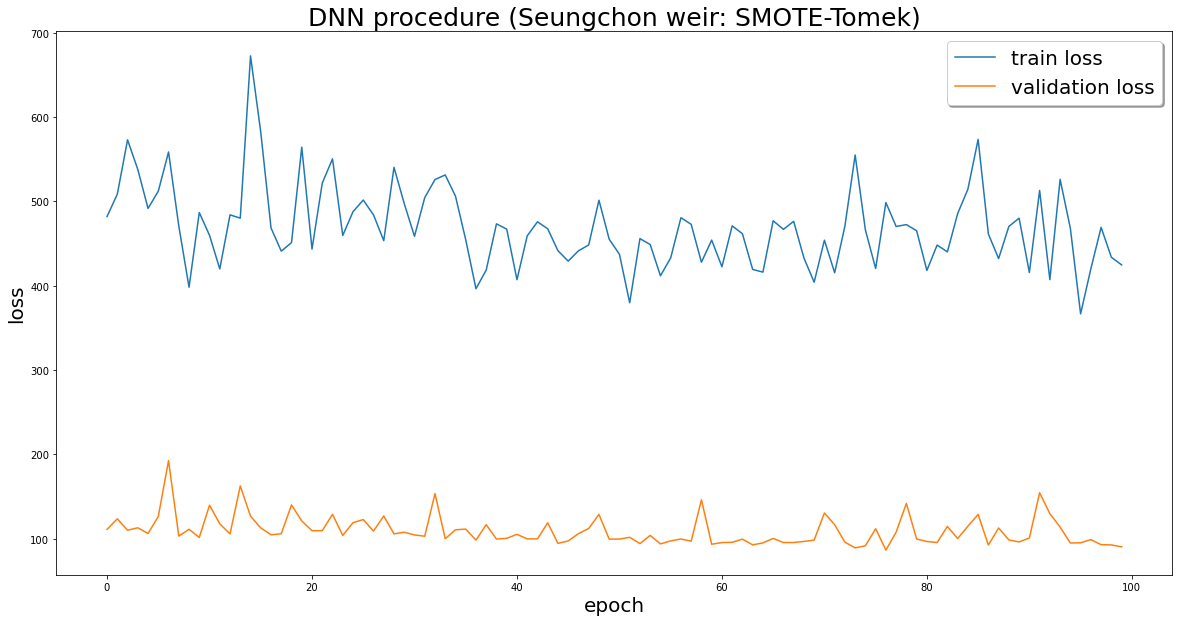

In [86]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Seungchon weir: SMOTE-Tomek)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN SC_SMOTE-Tomek_python.png')

In [87]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

In [88]:
# CNN model (SC)
SC_train_x_CNN = SC_train_x.to_numpy().reshape(SC_train_x.shape[0], SC_train_x.shape[1], 1)
SC_train_x_sm_CNN = SC_train_x_sm.to_numpy().reshape(SC_train_x_sm.shape[0], SC_train_x_sm.shape[1], 1) # SMOTE
SC_train_x_ads_CNN = SC_train_x_ads.to_numpy().reshape(SC_train_x_ads.shape[0], SC_train_x_ads.shape[1], 1) # ADASYN
SC_train_x_sme_CNN = SC_train_x_sme.to_numpy().reshape(SC_train_x_sme.shape[0], SC_train_x_sme.shape[1], 1) # SMOTE-ENN
SC_train_x_smt_CNN = SC_train_x_smt.to_numpy().reshape(SC_train_x_smt.shape[0], SC_train_x_smt.shape[1], 1) # SMOTE-Tomek
SC_test_x_CNN = SC_test_x.to_numpy().reshape(SC_test_x.shape[0], SC_test_x.shape[1], 1) 

In [89]:
# model
model = tf.keras.Sequential()  
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(18, 1)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(
        loss='mse',         # mean_squared_error(평균제곱오차)의 alias
        optimizer='adam',   # 최적화 기법 중 하나
        metrics=["mean_squared_error","mean_absolute_error"])    # 실험 후 관찰하고 싶은 metric 들을 나열함.

In [90]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 17, 64)            192       
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 32)            6176      
                                                                 
 max_pooling1d (MaxPooling1  (None, 7, 32)             0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 7, 32)             0         
                                                                 
 flatten (Flatten)           (None, 224)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                7200      
                                                      

In [91]:
# original
hist = model.fit(
    SC_train_x_CNN, SC_train_y,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
9/9 - 0s - loss: 2980.3450 - mean_squared_error: 2980.3450 - mean_absolute_error: 41.2739 - val_loss: 1458.4250 - val_mean_squared_error: 1458.4250 - val_mean_absolute_error: 30.0995 - 464ms/epoch - 52ms/step
Epoch 2/100
9/9 - 0s - loss: 1910.8600 - mean_squared_error: 1910.8600 - mean_absolute_error: 32.8795 - val_loss: 1331.3844 - val_mean_squared_error: 1331.3844 - val_mean_absolute_error: 27.4150 - 34ms/epoch - 4ms/step
Epoch 3/100
9/9 - 0s - loss: 1763.4714 - mean_squared_error: 1763.4714 - mean_absolute_error: 29.7163 - val_loss: 1372.6782 - val_mean_squared_error: 1372.6782 - val_mean_absolute_error: 27.4083 - 29ms/epoch - 3ms/step
Epoch 4/100
9/9 - 0s - loss: 1784.4464 - mean_squared_error: 1784.4464 - mean_absolute_error: 29.8569 - val_loss: 1327.2168 - val_mean_squared_error: 1327.2168 - val_mean_absolute_error: 27.0316 - 29ms/epoch - 3ms/step
Epoch 5/100
9/9 - 0s - loss: 1700.0128 - mean_squared_error: 1700.0128 - mean_absolute_error: 29.7971 - val_loss: 1309.404

Epoch 39/100
9/9 - 0s - loss: 1249.4312 - mean_squared_error: 1249.4312 - mean_absolute_error: 25.8460 - val_loss: 969.3408 - val_mean_squared_error: 969.3408 - val_mean_absolute_error: 24.4723 - 26ms/epoch - 3ms/step
Epoch 40/100
9/9 - 0s - loss: 1290.4795 - mean_squared_error: 1290.4795 - mean_absolute_error: 24.9401 - val_loss: 953.6201 - val_mean_squared_error: 953.6201 - val_mean_absolute_error: 24.3047 - 25ms/epoch - 3ms/step
Epoch 41/100
9/9 - 0s - loss: 1190.3342 - mean_squared_error: 1190.3342 - mean_absolute_error: 25.7206 - val_loss: 947.0209 - val_mean_squared_error: 947.0209 - val_mean_absolute_error: 23.8988 - 26ms/epoch - 3ms/step
Epoch 42/100
9/9 - 0s - loss: 1173.8768 - mean_squared_error: 1173.8768 - mean_absolute_error: 24.0122 - val_loss: 943.7100 - val_mean_squared_error: 943.7100 - val_mean_absolute_error: 24.4729 - 27ms/epoch - 3ms/step
Epoch 43/100
9/9 - 0s - loss: 1099.5530 - mean_squared_error: 1099.5530 - mean_absolute_error: 23.4945 - val_loss: 927.2209 - va

Epoch 77/100
9/9 - 0s - loss: 911.9643 - mean_squared_error: 911.9643 - mean_absolute_error: 21.3674 - val_loss: 838.9200 - val_mean_squared_error: 838.9200 - val_mean_absolute_error: 22.9300 - 27ms/epoch - 3ms/step
Epoch 78/100
9/9 - 0s - loss: 875.6801 - mean_squared_error: 875.6801 - mean_absolute_error: 20.9703 - val_loss: 889.9954 - val_mean_squared_error: 889.9954 - val_mean_absolute_error: 23.9774 - 30ms/epoch - 3ms/step
Epoch 79/100
9/9 - 0s - loss: 895.9208 - mean_squared_error: 895.9208 - mean_absolute_error: 21.5059 - val_loss: 862.3865 - val_mean_squared_error: 862.3865 - val_mean_absolute_error: 22.7839 - 28ms/epoch - 3ms/step
Epoch 80/100
9/9 - 0s - loss: 904.5274 - mean_squared_error: 904.5274 - mean_absolute_error: 21.3513 - val_loss: 896.9043 - val_mean_squared_error: 896.9043 - val_mean_absolute_error: 23.8611 - 28ms/epoch - 3ms/step
Epoch 81/100
9/9 - 0s - loss: 911.6626 - mean_squared_error: 911.6626 - mean_absolute_error: 22.1513 - val_loss: 842.7000 - val_mean_squ

In [92]:
scores = model.evaluate(SC_test_x_CNN, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 463.6076 - mean_squared_error: 463.6076 - mean_absolute_error: 16.0166
test_loss:  463.6076354980469
test_mae:  463.6076354980469


In [93]:
SC_test_y_pred_CNN = model.predict(SC_test_x_CNN)
SC_test_y_pred_CNN

2/2 [==============================] - 0s 2ms/step


array([[50.44382   ],
       [89.86375   ],
       [51.291016  ],
       [48.27495   ],
       [87.95611   ],
       [55.885574  ],
       [57.257633  ],
       [54.733112  ],
       [44.977932  ],
       [68.75007   ],
       [46.1329    ],
       [75.29782   ],
       [32.290718  ],
       [85.49313   ],
       [64.747116  ],
       [ 9.406024  ],
       [90.018776  ],
       [76.50479   ],
       [68.11705   ],
       [ 6.0212154 ],
       [ 9.511162  ],
       [ 7.876195  ],
       [ 0.13448645],
       [ 2.316355  ],
       [83.452324  ],
       [26.127415  ],
       [65.83396   ],
       [55.34286   ],
       [ 7.7596283 ],
       [30.649317  ],
       [74.459755  ],
       [ 4.902029  ],
       [ 7.379665  ],
       [27.74739   ],
       [60.166176  ],
       [81.4466    ],
       [82.84986   ],
       [78.38842   ],
       [28.394085  ],
       [65.92218   ],
       [22.107628  ],
       [42.60141   ],
       [51.01633   ],
       [30.605982  ],
       [29.953379  ]], dtype=flo

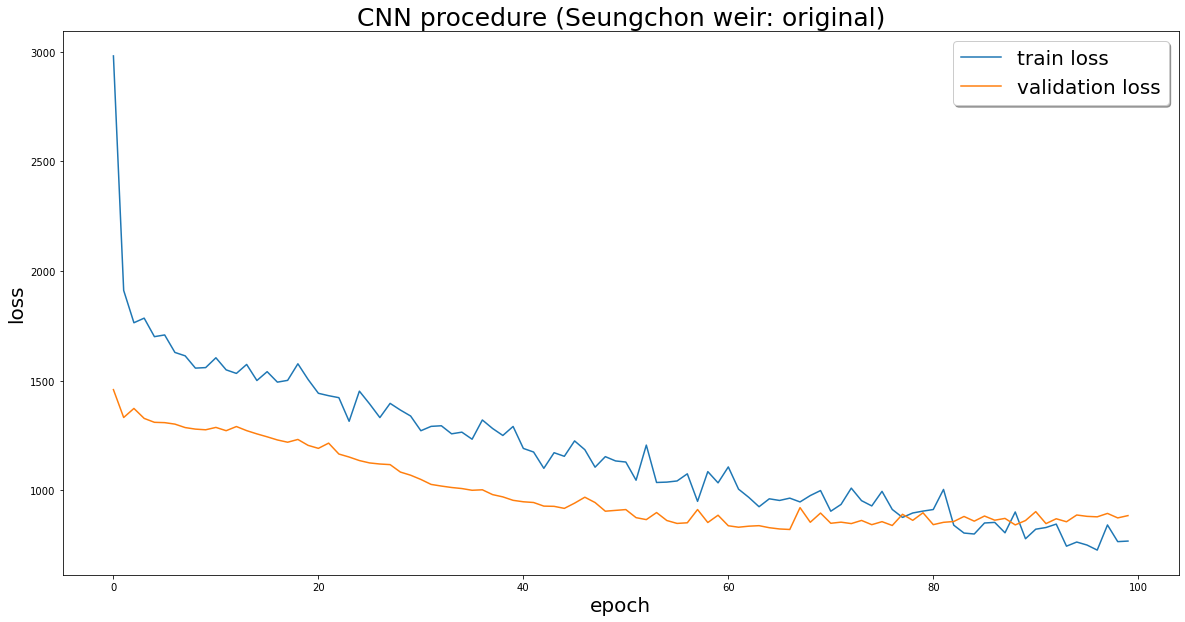

In [94]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Seungchon weir: original)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN SC_python.png')

In [95]:
# SMOTE
hist = model.fit(
    SC_train_x_sm_CNN, SC_train_y_sm,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
15/15 - 0s - loss: 757.3448 - mean_squared_error: 757.3448 - mean_absolute_error: 19.0849 - val_loss: 144.2302 - val_mean_squared_error: 144.2302 - val_mean_absolute_error: 8.8434 - 52ms/epoch - 3ms/step
Epoch 2/100
15/15 - 0s - loss: 729.1927 - mean_squared_error: 729.1927 - mean_absolute_error: 18.8651 - val_loss: 113.5163 - val_mean_squared_error: 113.5163 - val_mean_absolute_error: 7.8189 - 35ms/epoch - 2ms/step
Epoch 3/100
15/15 - 0s - loss: 674.4403 - mean_squared_error: 674.4403 - mean_absolute_error: 18.6943 - val_loss: 128.6421 - val_mean_squared_error: 128.6421 - val_mean_absolute_error: 8.1847 - 34ms/epoch - 2ms/step
Epoch 4/100
15/15 - 0s - loss: 689.0383 - mean_squared_error: 689.0383 - mean_absolute_error: 18.5994 - val_loss: 121.5114 - val_mean_squared_error: 121.5114 - val_mean_absolute_error: 7.7870 - 35ms/epoch - 2ms/step
Epoch 5/100
15/15 - 0s - loss: 714.4157 - mean_squared_error: 714.4157 - mean_absolute_error: 18.9442 - val_loss: 112.3923 - val_mean_sq

Epoch 39/100
15/15 - 0s - loss: 636.7399 - mean_squared_error: 636.7399 - mean_absolute_error: 17.2562 - val_loss: 109.9828 - val_mean_squared_error: 109.9828 - val_mean_absolute_error: 7.7049 - 34ms/epoch - 2ms/step
Epoch 40/100
15/15 - 0s - loss: 641.9882 - mean_squared_error: 641.9882 - mean_absolute_error: 17.3137 - val_loss: 147.9366 - val_mean_squared_error: 147.9366 - val_mean_absolute_error: 8.8528 - 34ms/epoch - 2ms/step
Epoch 41/100
15/15 - 0s - loss: 668.8387 - mean_squared_error: 668.8387 - mean_absolute_error: 17.8927 - val_loss: 106.4471 - val_mean_squared_error: 106.4471 - val_mean_absolute_error: 7.6765 - 34ms/epoch - 2ms/step
Epoch 42/100
15/15 - 0s - loss: 647.6224 - mean_squared_error: 647.6224 - mean_absolute_error: 17.6069 - val_loss: 107.8393 - val_mean_squared_error: 107.8393 - val_mean_absolute_error: 7.6686 - 32ms/epoch - 2ms/step
Epoch 43/100
15/15 - 0s - loss: 599.4309 - mean_squared_error: 599.4309 - mean_absolute_error: 17.3436 - val_loss: 117.7681 - val_me

Epoch 77/100
15/15 - 0s - loss: 618.0873 - mean_squared_error: 618.0873 - mean_absolute_error: 17.2354 - val_loss: 106.1395 - val_mean_squared_error: 106.1395 - val_mean_absolute_error: 7.6834 - 33ms/epoch - 2ms/step
Epoch 78/100
15/15 - 0s - loss: 619.2298 - mean_squared_error: 619.2298 - mean_absolute_error: 17.2862 - val_loss: 105.5051 - val_mean_squared_error: 105.5051 - val_mean_absolute_error: 7.7344 - 34ms/epoch - 2ms/step
Epoch 79/100
15/15 - 0s - loss: 609.2451 - mean_squared_error: 609.2451 - mean_absolute_error: 17.2455 - val_loss: 105.3068 - val_mean_squared_error: 105.3068 - val_mean_absolute_error: 7.7285 - 32ms/epoch - 2ms/step
Epoch 80/100
15/15 - 0s - loss: 595.5654 - mean_squared_error: 595.5654 - mean_absolute_error: 16.4130 - val_loss: 107.6289 - val_mean_squared_error: 107.6289 - val_mean_absolute_error: 7.6953 - 34ms/epoch - 2ms/step
Epoch 81/100
15/15 - 0s - loss: 638.3552 - mean_squared_error: 638.3552 - mean_absolute_error: 17.2880 - val_loss: 114.1223 - val_me

In [96]:
scores = model.evaluate(SC_test_x_CNN, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 361.7048 - mean_squared_error: 361.7048 - mean_absolute_error: 14.4242
test_loss:  361.70477294921875
test_mae:  361.70477294921875


In [97]:
SC_test_y_pred_CNN_sm = model.predict(SC_test_x_CNN)
SC_test_y_pred_CNN_sm

2/2 [==============================] - 0s 1ms/step


array([[51.16904  ],
       [88.989815 ],
       [58.197834 ],
       [56.414345 ],
       [96.70309  ],
       [60.540867 ],
       [65.14381  ],
       [61.300114 ],
       [38.76681  ],
       [64.884026 ],
       [52.180714 ],
       [81.35052  ],
       [25.24043  ],
       [85.85253  ],
       [56.187572 ],
       [14.503315 ],
       [86.165985 ],
       [67.5162   ],
       [58.17243  ],
       [17.968513 ],
       [11.817151 ],
       [ 9.573103 ],
       [ 4.219648 ],
       [ 5.3637133],
       [76.61451  ],
       [30.744308 ],
       [55.793407 ],
       [41.958424 ],
       [14.53883  ],
       [23.24939  ],
       [62.73596  ],
       [ 7.1421804],
       [ 8.8904295],
       [20.913961 ],
       [56.952557 ],
       [80.57861  ],
       [82.68911  ],
       [76.97543  ],
       [35.332176 ],
       [65.2017   ],
       [23.191072 ],
       [44.270096 ],
       [52.621174 ],
       [41.61831  ],
       [28.442554 ]], dtype=float32)

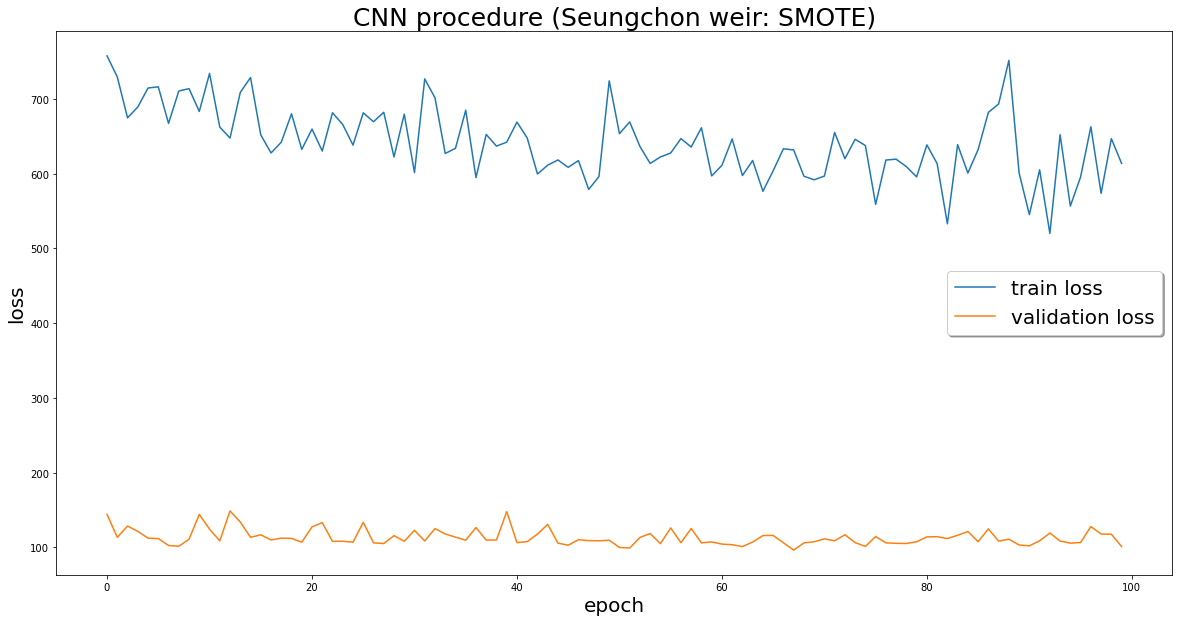

In [98]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Seungchon weir: SMOTE)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN SC_SMOTE_python.png')

In [99]:
# ADASYN
hist = model.fit(
    SC_train_x_ads_CNN, SC_train_y_ads,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
14/14 - 0s - loss: 667.0093 - mean_squared_error: 667.0093 - mean_absolute_error: 17.5905 - val_loss: 116.8692 - val_mean_squared_error: 116.8692 - val_mean_absolute_error: 7.4604 - 54ms/epoch - 4ms/step
Epoch 2/100
14/14 - 0s - loss: 628.2887 - mean_squared_error: 628.2887 - mean_absolute_error: 18.1079 - val_loss: 129.4672 - val_mean_squared_error: 129.4672 - val_mean_absolute_error: 7.4519 - 34ms/epoch - 2ms/step
Epoch 3/100
14/14 - 0s - loss: 621.7065 - mean_squared_error: 621.7065 - mean_absolute_error: 17.9513 - val_loss: 125.4819 - val_mean_squared_error: 125.4819 - val_mean_absolute_error: 7.4408 - 33ms/epoch - 2ms/step
Epoch 4/100
14/14 - 0s - loss: 563.4838 - mean_squared_error: 563.4838 - mean_absolute_error: 17.1144 - val_loss: 135.7502 - val_mean_squared_error: 135.7502 - val_mean_absolute_error: 7.5491 - 33ms/epoch - 2ms/step
Epoch 5/100
14/14 - 0s - loss: 586.5355 - mean_squared_error: 586.5355 - mean_absolute_error: 17.4862 - val_loss: 149.6246 - val_mean_sq

Epoch 39/100
14/14 - 0s - loss: 689.6622 - mean_squared_error: 689.6622 - mean_absolute_error: 18.2048 - val_loss: 129.8937 - val_mean_squared_error: 129.8937 - val_mean_absolute_error: 7.5986 - 32ms/epoch - 2ms/step
Epoch 40/100
14/14 - 0s - loss: 596.1808 - mean_squared_error: 596.1808 - mean_absolute_error: 17.3318 - val_loss: 131.8048 - val_mean_squared_error: 131.8048 - val_mean_absolute_error: 7.7427 - 33ms/epoch - 2ms/step
Epoch 41/100
14/14 - 0s - loss: 577.6205 - mean_squared_error: 577.6205 - mean_absolute_error: 17.7707 - val_loss: 161.4490 - val_mean_squared_error: 161.4490 - val_mean_absolute_error: 8.0633 - 32ms/epoch - 2ms/step
Epoch 42/100
14/14 - 0s - loss: 602.6357 - mean_squared_error: 602.6357 - mean_absolute_error: 18.1527 - val_loss: 128.6988 - val_mean_squared_error: 128.6988 - val_mean_absolute_error: 7.8321 - 33ms/epoch - 2ms/step
Epoch 43/100
14/14 - 0s - loss: 571.2666 - mean_squared_error: 571.2666 - mean_absolute_error: 17.3103 - val_loss: 129.2510 - val_me

Epoch 77/100
14/14 - 0s - loss: 517.9601 - mean_squared_error: 517.9601 - mean_absolute_error: 16.5892 - val_loss: 128.5589 - val_mean_squared_error: 128.5589 - val_mean_absolute_error: 7.5659 - 32ms/epoch - 2ms/step
Epoch 78/100
14/14 - 0s - loss: 445.1698 - mean_squared_error: 445.1698 - mean_absolute_error: 15.6172 - val_loss: 124.1742 - val_mean_squared_error: 124.1742 - val_mean_absolute_error: 7.3877 - 34ms/epoch - 2ms/step
Epoch 79/100
14/14 - 0s - loss: 513.5084 - mean_squared_error: 513.5084 - mean_absolute_error: 16.4216 - val_loss: 130.0665 - val_mean_squared_error: 130.0665 - val_mean_absolute_error: 7.5137 - 32ms/epoch - 2ms/step
Epoch 80/100
14/14 - 0s - loss: 524.2892 - mean_squared_error: 524.2892 - mean_absolute_error: 16.4544 - val_loss: 122.8837 - val_mean_squared_error: 122.8837 - val_mean_absolute_error: 7.2994 - 33ms/epoch - 2ms/step
Epoch 81/100
14/14 - 0s - loss: 505.5737 - mean_squared_error: 505.5737 - mean_absolute_error: 15.9900 - val_loss: 131.1253 - val_me

In [100]:
scores = model.evaluate(SC_test_x_CNN, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 3ms/step - loss: 486.1976 - mean_squared_error: 486.1976 - mean_absolute_error: 17.6674
test_loss:  486.19757080078125
test_mae:  486.19757080078125


In [101]:
SC_test_y_pred_CNN_ads = model.predict(SC_test_x_CNN)
SC_test_y_pred_CNN_ads

2/2 [==============================] - 0s 998us/step


array([[54.03429  ],
       [87.36636  ],
       [66.49656  ],
       [63.748394 ],
       [96.85618  ],
       [64.94452  ],
       [74.20625  ],
       [70.47581  ],
       [47.472412 ],
       [66.77103  ],
       [61.69327  ],
       [87.20574  ],
       [25.401958 ],
       [86.64443  ],
       [57.87891  ],
       [18.278934 ],
       [89.49789  ],
       [71.95123  ],
       [64.86325  ],
       [35.494045 ],
       [16.644135 ],
       [11.543032 ],
       [ 4.55875  ],
       [ 5.4271426],
       [90.95976  ],
       [47.53326  ],
       [65.834915 ],
       [51.933434 ],
       [26.943684 ],
       [34.97951  ],
       [63.362377 ],
       [ 7.056861 ],
       [12.61304  ],
       [28.490887 ],
       [63.34595  ],
       [79.150955 ],
       [84.8721   ],
       [81.635086 ],
       [47.171375 ],
       [70.83365  ],
       [26.851593 ],
       [48.497658 ],
       [55.697334 ],
       [52.558777 ],
       [32.501    ]], dtype=float32)

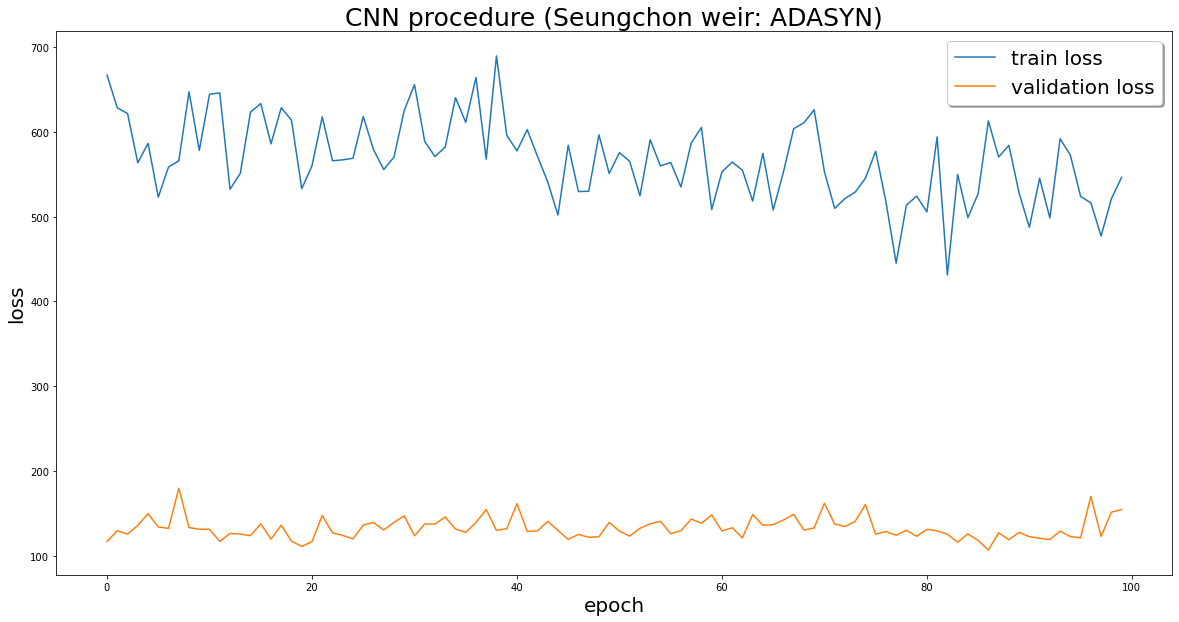

In [102]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Seungchon weir: ADASYN)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN SC_ADASYN_python.png')

In [103]:
# SMOTE-ENN
hist = model.fit(
    SC_train_x_sme_CNN, SC_train_y_sme,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
8/8 - 0s - loss: 383.7937 - mean_squared_error: 383.7937 - mean_absolute_error: 13.6568 - val_loss: 240.9117 - val_mean_squared_error: 240.9117 - val_mean_absolute_error: 12.0765 - 46ms/epoch - 6ms/step
Epoch 2/100
8/8 - 0s - loss: 369.7869 - mean_squared_error: 369.7869 - mean_absolute_error: 12.5412 - val_loss: 318.1463 - val_mean_squared_error: 318.1463 - val_mean_absolute_error: 14.0085 - 25ms/epoch - 3ms/step
Epoch 3/100
8/8 - 0s - loss: 337.1636 - mean_squared_error: 337.1636 - mean_absolute_error: 11.3908 - val_loss: 261.0588 - val_mean_squared_error: 261.0588 - val_mean_absolute_error: 12.7214 - 25ms/epoch - 3ms/step
Epoch 4/100
8/8 - 0s - loss: 362.3586 - mean_squared_error: 362.3586 - mean_absolute_error: 11.9572 - val_loss: 312.2850 - val_mean_squared_error: 312.2850 - val_mean_absolute_error: 14.0318 - 26ms/epoch - 3ms/step
Epoch 5/100
8/8 - 0s - loss: 366.8992 - mean_squared_error: 366.8992 - mean_absolute_error: 11.6422 - val_loss: 332.5197 - val_mean_squared_

Epoch 39/100
8/8 - 0s - loss: 283.4337 - mean_squared_error: 283.4337 - mean_absolute_error: 10.2169 - val_loss: 233.2576 - val_mean_squared_error: 233.2576 - val_mean_absolute_error: 12.1957 - 26ms/epoch - 3ms/step
Epoch 40/100
8/8 - 0s - loss: 285.8328 - mean_squared_error: 285.8328 - mean_absolute_error: 10.1618 - val_loss: 245.2316 - val_mean_squared_error: 245.2316 - val_mean_absolute_error: 12.3674 - 27ms/epoch - 3ms/step
Epoch 41/100
8/8 - 0s - loss: 303.5826 - mean_squared_error: 303.5826 - mean_absolute_error: 11.0876 - val_loss: 283.0375 - val_mean_squared_error: 283.0375 - val_mean_absolute_error: 13.4049 - 26ms/epoch - 3ms/step
Epoch 42/100
8/8 - 0s - loss: 255.7569 - mean_squared_error: 255.7569 - mean_absolute_error: 9.8416 - val_loss: 230.9581 - val_mean_squared_error: 230.9581 - val_mean_absolute_error: 11.9558 - 24ms/epoch - 3ms/step
Epoch 43/100
8/8 - 0s - loss: 286.3432 - mean_squared_error: 286.3432 - mean_absolute_error: 10.6932 - val_loss: 249.7320 - val_mean_squa

Epoch 77/100
8/8 - 0s - loss: 274.2544 - mean_squared_error: 274.2544 - mean_absolute_error: 10.1981 - val_loss: 236.0603 - val_mean_squared_error: 236.0603 - val_mean_absolute_error: 12.3740 - 24ms/epoch - 3ms/step
Epoch 78/100
8/8 - 0s - loss: 282.2947 - mean_squared_error: 282.2947 - mean_absolute_error: 10.4729 - val_loss: 302.1200 - val_mean_squared_error: 302.1200 - val_mean_absolute_error: 13.8535 - 25ms/epoch - 3ms/step
Epoch 79/100
8/8 - 0s - loss: 225.0104 - mean_squared_error: 225.0104 - mean_absolute_error: 9.4334 - val_loss: 229.7272 - val_mean_squared_error: 229.7272 - val_mean_absolute_error: 12.2698 - 25ms/epoch - 3ms/step
Epoch 80/100
8/8 - 0s - loss: 268.3434 - mean_squared_error: 268.3434 - mean_absolute_error: 10.2422 - val_loss: 226.7054 - val_mean_squared_error: 226.7054 - val_mean_absolute_error: 12.2372 - 24ms/epoch - 3ms/step
Epoch 81/100
8/8 - 0s - loss: 224.8042 - mean_squared_error: 224.8042 - mean_absolute_error: 9.7788 - val_loss: 227.9871 - val_mean_squar

In [104]:
scores = model.evaluate(SC_test_x_CNN, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 3ms/step - loss: 655.4714 - mean_squared_error: 655.4714 - mean_absolute_error: 21.2027
test_loss:  655.471435546875
test_mae:  655.471435546875


In [105]:
SC_test_y_pred_CNN_sme = model.predict(SC_test_x_CNN)
SC_test_y_pred_CNN_sme

2/2 [==============================] - 0s 1000us/step


array([[ 61.731987 ],
       [ 85.82265  ],
       [ 77.678055 ],
       [ 75.768745 ],
       [114.56355  ],
       [ 82.81146  ],
       [ 91.049355 ],
       [ 89.75558  ],
       [ 43.89719  ],
       [ 87.279366 ],
       [ 76.70797  ],
       [116.47596  ],
       [ 29.038536 ],
       [ 82.19326  ],
       [ 73.25317  ],
       [ 34.19757  ],
       [ 95.12566  ],
       [ 68.32784  ],
       [ 55.360092 ],
       [ 39.412586 ],
       [ 10.497936 ],
       [  7.463016 ],
       [  3.4226446],
       [  3.9303055],
       [ 84.95466  ],
       [ 45.4614   ],
       [ 53.852665 ],
       [ 34.298733 ],
       [ 12.472952 ],
       [ 20.355875 ],
       [ 52.75991  ],
       [  5.014462 ],
       [  8.085409 ],
       [ 21.61925  ],
       [ 71.116066 ],
       [ 69.17045  ],
       [ 89.37936  ],
       [ 91.8343   ],
       [ 51.003613 ],
       [ 68.41732  ],
       [ 29.014042 ],
       [ 63.312943 ],
       [ 72.85738  ],
       [ 65.37087  ],
       [ 30.561995 ]], dtype=flo

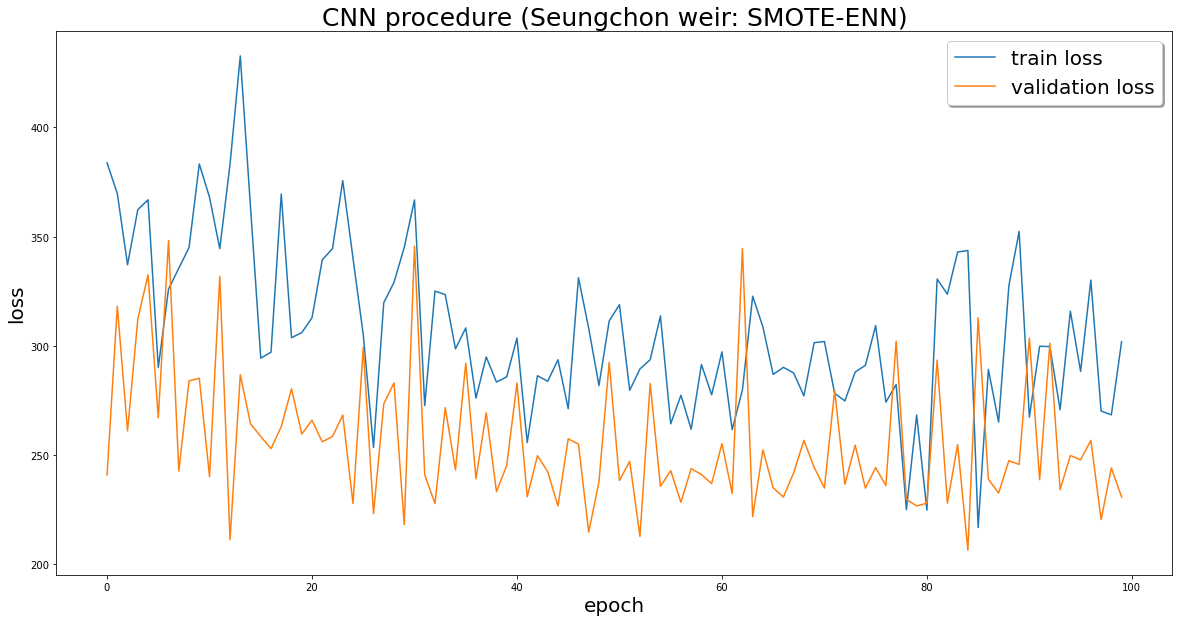

In [106]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Seungchon weir: SMOTE-ENN)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN SC_SMOTE_ENN_python.png')

In [107]:
# SMOTE-Tomek
hist = model.fit(
    SC_train_x_smt_CNN, SC_train_y_smt,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
14/14 - 0s - loss: 520.9144 - mean_squared_error: 520.9144 - mean_absolute_error: 15.7784 - val_loss: 114.8044 - val_mean_squared_error: 114.8044 - val_mean_absolute_error: 7.3549 - 57ms/epoch - 4ms/step
Epoch 2/100
14/14 - 0s - loss: 514.4056 - mean_squared_error: 514.4056 - mean_absolute_error: 15.8785 - val_loss: 146.2186 - val_mean_squared_error: 146.2186 - val_mean_absolute_error: 8.7184 - 35ms/epoch - 2ms/step
Epoch 3/100
14/14 - 0s - loss: 642.4124 - mean_squared_error: 642.4124 - mean_absolute_error: 16.9059 - val_loss: 113.7814 - val_mean_squared_error: 113.7814 - val_mean_absolute_error: 7.4246 - 34ms/epoch - 2ms/step
Epoch 4/100
14/14 - 0s - loss: 536.7749 - mean_squared_error: 536.7749 - mean_absolute_error: 15.8682 - val_loss: 137.0725 - val_mean_squared_error: 137.0725 - val_mean_absolute_error: 8.2663 - 34ms/epoch - 2ms/step
Epoch 5/100
14/14 - 0s - loss: 499.4095 - mean_squared_error: 499.4095 - mean_absolute_error: 15.3751 - val_loss: 107.8918 - val_mean_sq

Epoch 39/100
14/14 - 0s - loss: 455.5205 - mean_squared_error: 455.5205 - mean_absolute_error: 14.6188 - val_loss: 111.8711 - val_mean_squared_error: 111.8711 - val_mean_absolute_error: 7.5216 - 35ms/epoch - 2ms/step
Epoch 40/100
14/14 - 0s - loss: 465.3399 - mean_squared_error: 465.3399 - mean_absolute_error: 15.4666 - val_loss: 108.6443 - val_mean_squared_error: 108.6443 - val_mean_absolute_error: 7.3247 - 34ms/epoch - 2ms/step
Epoch 41/100
14/14 - 0s - loss: 457.5616 - mean_squared_error: 457.5616 - mean_absolute_error: 14.5098 - val_loss: 95.6431 - val_mean_squared_error: 95.6431 - val_mean_absolute_error: 6.9093 - 33ms/epoch - 2ms/step
Epoch 42/100
14/14 - 0s - loss: 511.2057 - mean_squared_error: 511.2057 - mean_absolute_error: 15.8388 - val_loss: 102.7170 - val_mean_squared_error: 102.7170 - val_mean_absolute_error: 7.3095 - 34ms/epoch - 2ms/step
Epoch 43/100
14/14 - 0s - loss: 413.9730 - mean_squared_error: 413.9730 - mean_absolute_error: 14.6497 - val_loss: 87.8488 - val_mean_

Epoch 77/100
14/14 - 0s - loss: 420.7726 - mean_squared_error: 420.7726 - mean_absolute_error: 14.2006 - val_loss: 94.5426 - val_mean_squared_error: 94.5426 - val_mean_absolute_error: 7.0811 - 32ms/epoch - 2ms/step
Epoch 78/100
14/14 - 0s - loss: 411.1342 - mean_squared_error: 411.1342 - mean_absolute_error: 14.4708 - val_loss: 117.0616 - val_mean_squared_error: 117.0616 - val_mean_absolute_error: 7.6158 - 32ms/epoch - 2ms/step
Epoch 79/100
14/14 - 0s - loss: 416.0455 - mean_squared_error: 416.0455 - mean_absolute_error: 14.5981 - val_loss: 100.0255 - val_mean_squared_error: 100.0255 - val_mean_absolute_error: 6.9416 - 35ms/epoch - 3ms/step
Epoch 80/100
14/14 - 0s - loss: 467.5568 - mean_squared_error: 467.5568 - mean_absolute_error: 14.8380 - val_loss: 95.1227 - val_mean_squared_error: 95.1227 - val_mean_absolute_error: 6.9067 - 33ms/epoch - 2ms/step
Epoch 81/100
14/14 - 0s - loss: 447.5540 - mean_squared_error: 447.5540 - mean_absolute_error: 15.1210 - val_loss: 106.6133 - val_mean_s

In [108]:
scores = model.evaluate(SC_test_x_CNN, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 438.7955 - mean_squared_error: 438.7955 - mean_absolute_error: 15.4494
test_loss:  438.7955322265625
test_mae:  438.7955322265625


In [109]:
SC_test_y_pred_CNN_smt = model.predict(SC_test_x_CNN)
SC_test_y_pred_CNN_smt

2/2 [==============================] - 0s 1ms/step


array([[49.655964 ],
       [87.47711  ],
       [62.745544 ],
       [63.04112  ],
       [96.20816  ],
       [65.546814 ],
       [72.79822  ],
       [69.183075 ],
       [42.976013 ],
       [63.56953  ],
       [58.406372 ],
       [94.02214  ],
       [24.626625 ],
       [80.55647  ],
       [53.40646  ],
       [21.44698  ],
       [83.129395 ],
       [66.12913  ],
       [56.45472  ],
       [27.14744  ],
       [ 8.913459 ],
       [ 8.080373 ],
       [ 4.1515894],
       [ 3.224366 ],
       [95.27693  ],
       [50.005634 ],
       [55.27849  ],
       [41.062992 ],
       [10.981995 ],
       [28.838903 ],
       [54.930305 ],
       [ 3.8542368],
       [ 5.192318 ],
       [17.056164 ],
       [60.811165 ],
       [75.9392   ],
       [86.756905 ],
       [83.215866 ],
       [43.301437 ],
       [85.69524  ],
       [23.549408 ],
       [51.498363 ],
       [56.754295 ],
       [55.22312  ],
       [27.845692 ]], dtype=float32)

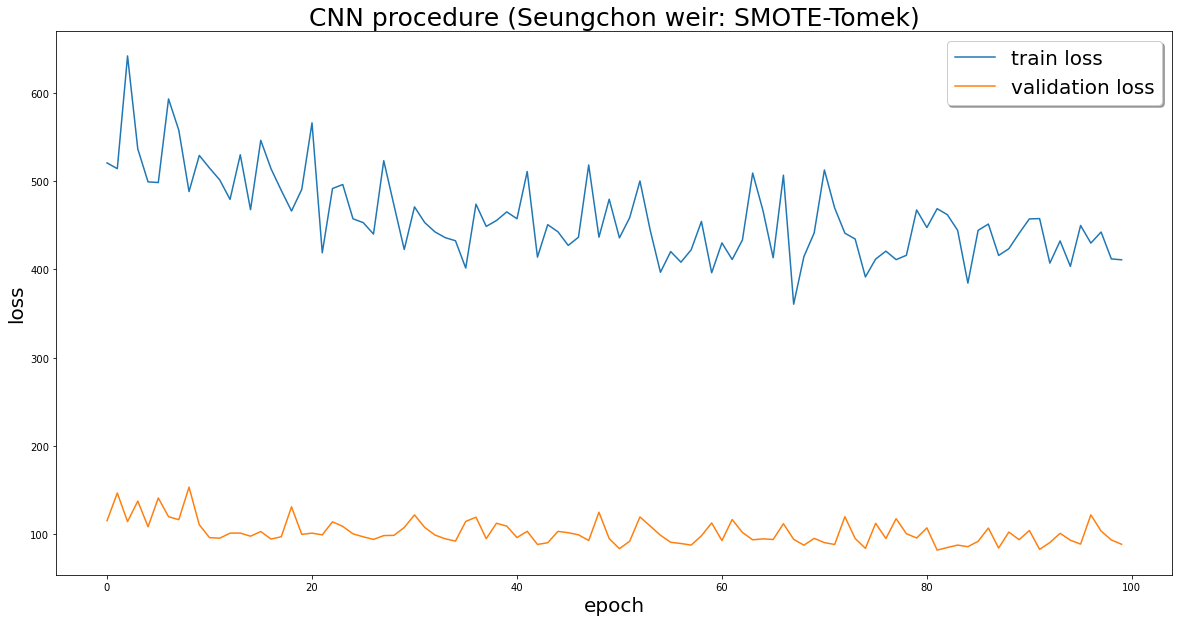

In [110]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Seungchon weir: SMOTE-Tomek)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN SC_SMOTE_Tomek_python.png')

In [111]:
SC_test_y = np.array(SC_test_y, dtype=np.float32)

In [112]:
### write data
import pandas as pd

df_SC = pd.DataFrame([SC_test_y, SC_test_y_pred_DNN, SC_test_y_pred_DNN_sm, 
                      SC_test_y_pred_DNN_ads, SC_test_y_pred_DNN_sme, SC_test_y_pred_DNN_smt,
                      SC_test_y_pred_CNN, SC_test_y_pred_CNN_sm, 
                      SC_test_y_pred_CNN_ads, SC_test_y_pred_CNN_sme, SC_test_y_pred_CNN_smt]).T
df_SC.columns = ['Chla', 'DNN', 'DNN_SMOTE', 'DNN_ADASYN', 'DNN_SMOTE_ENN', 'DNN_SMOTE_Tomek',
                 'CNN', 'CNN_SMOTE', 'CNN_ADASYN', 'CNN_SMOTE_ENN', 'CNN_SMOTE_Tomek']
df_SC.to_csv('df_SC_res.csv', index=False, encoding='cp949') 

In [113]:
import tensorflow as tf

In [114]:
from tensorflow.keras import layers  #모듈(변수나 함수를 포함)만 불러오기
from sklearn.preprocessing import StandardScaler, MinMaxScaler  #표준 정규화, 최대-최소 정규화
from keras.layers import Dropout

In [115]:
## DNN model (JS)
# model
model = tf.keras.Sequential()  
model.add(layers.Dense(64, input_shape=(18,)))  
model.add(layers.Activation('relu'))  
model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))
model.add(layers.Dense(16))         
model.add(layers.Activation('relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1))
model.add(layers.Activation('linear')) 

model.compile(
        loss='mse',         # mean_squared_error(평균제곱오차)의 alias
        optimizer='adam',   # 최적화 기법 중 하나
        metrics=["mean_squared_error","mean_absolute_error"])    # 실험 후 관찰하고 싶은 metric 들을 나열함. 

In [116]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1216      
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 activation_5 (Activation)   (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 activation_6 (Activation)   (None, 16)                0         
                                                                 
 dropout_3 (Dropout)         (None, 16)               

In [117]:
# Original
hist = model.fit(
    JS_train_x, JS_train_y,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
9/9 - 0s - loss: 6575.0684 - mean_squared_error: 6575.0684 - mean_absolute_error: 66.2044 - val_loss: 2229.8403 - val_mean_squared_error: 2229.8403 - val_mean_absolute_error: 37.1258 - 403ms/epoch - 45ms/step
Epoch 2/100
9/9 - 0s - loss: 3240.0803 - mean_squared_error: 3240.0803 - mean_absolute_error: 40.4355 - val_loss: 1042.8148 - val_mean_squared_error: 1042.8148 - val_mean_absolute_error: 24.3863 - 25ms/epoch - 3ms/step
Epoch 3/100
9/9 - 0s - loss: 2105.9736 - mean_squared_error: 2105.9736 - mean_absolute_error: 33.5970 - val_loss: 1030.3075 - val_mean_squared_error: 1030.3075 - val_mean_absolute_error: 26.3979 - 22ms/epoch - 2ms/step
Epoch 4/100
9/9 - 0s - loss: 2123.6631 - mean_squared_error: 2123.6631 - mean_absolute_error: 35.5083 - val_loss: 1075.7726 - val_mean_squared_error: 1075.7726 - val_mean_absolute_error: 27.3502 - 21ms/epoch - 2ms/step
Epoch 5/100
9/9 - 0s - loss: 2250.3320 - mean_squared_error: 2250.3320 - mean_absolute_error: 35.0392 - val_loss: 1086.072

Epoch 39/100
9/9 - 0s - loss: 1311.9291 - mean_squared_error: 1311.9291 - mean_absolute_error: 25.4003 - val_loss: 743.1432 - val_mean_squared_error: 743.1432 - val_mean_absolute_error: 22.7396 - 21ms/epoch - 2ms/step
Epoch 40/100
9/9 - 0s - loss: 1499.5372 - mean_squared_error: 1499.5372 - mean_absolute_error: 25.8025 - val_loss: 837.6089 - val_mean_squared_error: 837.6089 - val_mean_absolute_error: 24.9100 - 20ms/epoch - 2ms/step
Epoch 41/100
9/9 - 0s - loss: 1205.1820 - mean_squared_error: 1205.1820 - mean_absolute_error: 24.4998 - val_loss: 735.9636 - val_mean_squared_error: 735.9636 - val_mean_absolute_error: 22.9800 - 21ms/epoch - 2ms/step
Epoch 42/100
9/9 - 0s - loss: 1245.7357 - mean_squared_error: 1245.7357 - mean_absolute_error: 25.0745 - val_loss: 906.6749 - val_mean_squared_error: 906.6749 - val_mean_absolute_error: 26.5872 - 20ms/epoch - 2ms/step
Epoch 43/100
9/9 - 0s - loss: 1245.6406 - mean_squared_error: 1245.6406 - mean_absolute_error: 25.2364 - val_loss: 707.4572 - va

Epoch 77/100
9/9 - 0s - loss: 943.2007 - mean_squared_error: 943.2007 - mean_absolute_error: 21.6847 - val_loss: 433.0861 - val_mean_squared_error: 433.0861 - val_mean_absolute_error: 16.5599 - 20ms/epoch - 2ms/step
Epoch 78/100
9/9 - 0s - loss: 1019.2455 - mean_squared_error: 1019.2455 - mean_absolute_error: 20.8241 - val_loss: 579.1422 - val_mean_squared_error: 579.1422 - val_mean_absolute_error: 20.3789 - 20ms/epoch - 2ms/step
Epoch 79/100
9/9 - 0s - loss: 997.1360 - mean_squared_error: 997.1360 - mean_absolute_error: 21.2959 - val_loss: 555.0880 - val_mean_squared_error: 555.0880 - val_mean_absolute_error: 19.7187 - 21ms/epoch - 2ms/step
Epoch 80/100
9/9 - 0s - loss: 1020.1063 - mean_squared_error: 1020.1063 - mean_absolute_error: 22.0461 - val_loss: 441.0204 - val_mean_squared_error: 441.0204 - val_mean_absolute_error: 16.8178 - 21ms/epoch - 2ms/step
Epoch 81/100
9/9 - 0s - loss: 979.7335 - mean_squared_error: 979.7335 - mean_absolute_error: 21.5762 - val_loss: 441.0154 - val_mean

In [118]:
scores = model.evaluate(JS_test_x, JS_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 696.8447 - mean_squared_error: 696.8446 - mean_absolute_error: 20.9098
test_loss:  696.8446655273438
test_mae:  696.8446044921875


In [119]:
JS_test_y_pred_DNN = model.predict(JS_test_x)
JS_test_y_pred_DNN

2/2 [==============================] - 0s 1ms/step


array([[ 46.085293 ],
       [ 70.33191  ],
       [112.45583  ],
       [ 76.23545  ],
       [ 45.4559   ],
       [ 32.11147  ],
       [ 35.447273 ],
       [ 53.322426 ],
       [ 30.624876 ],
       [ 52.42431  ],
       [ 39.842155 ],
       [ 27.976229 ],
       [ 35.163788 ],
       [ 57.81315  ],
       [ 38.759384 ],
       [ 36.744846 ],
       [ 65.46337  ],
       [ 42.42065  ],
       [ 55.420666 ],
       [ 25.833506 ],
       [ 26.695173 ],
       [  9.915547 ],
       [  5.838901 ],
       [  4.6185684],
       [ 50.146988 ],
       [ 35.176598 ],
       [ 54.922142 ],
       [ 36.027145 ],
       [ 14.457771 ],
       [ 46.115578 ],
       [ 39.396164 ],
       [  7.305931 ],
       [ 18.478645 ],
       [ 56.607254 ],
       [ 73.67156  ],
       [ 84.734375 ],
       [ 62.947563 ],
       [ 51.50572  ],
       [ 47.37638  ],
       [ 34.15319  ],
       [ 28.810982 ],
       [ 31.111849 ],
       [ 21.27188  ],
       [ 32.615456 ],
       [ 50.00556  ]], dtype=flo

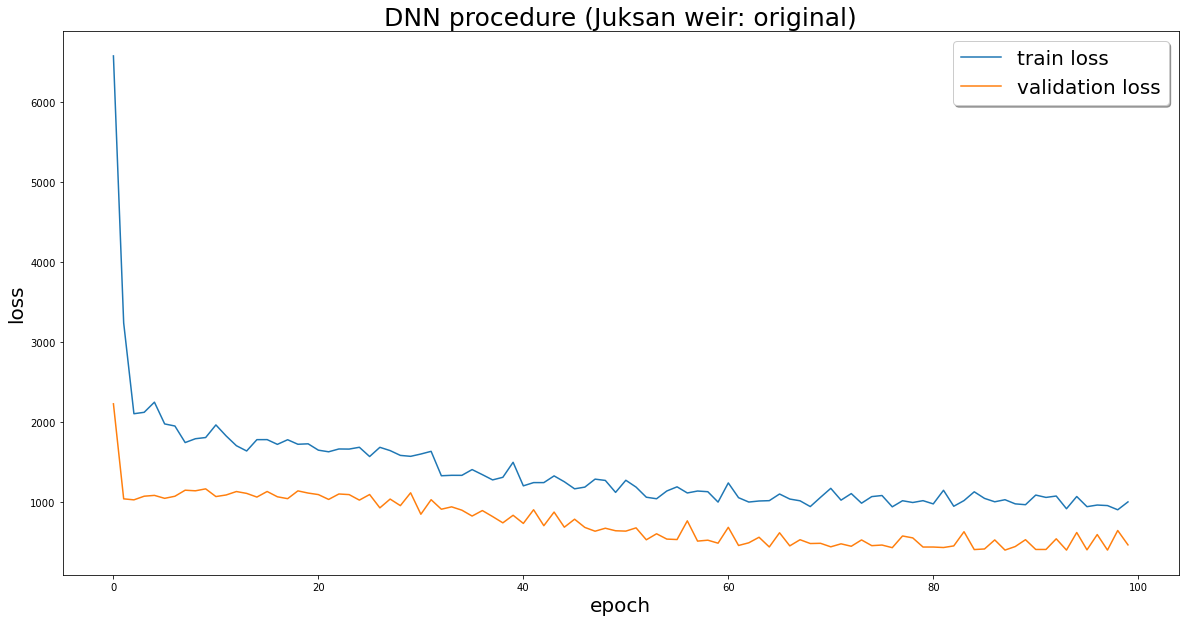

In [120]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Juksan weir: original)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN JS_python.png')

In [121]:
# SMOTE
hist = model.fit(
    JS_train_x_sm, JS_train_y_sm,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
14/14 - 0s - loss: 995.6810 - mean_squared_error: 995.6810 - mean_absolute_error: 22.1300 - val_loss: 135.2421 - val_mean_squared_error: 135.2421 - val_mean_absolute_error: 8.7788 - 47ms/epoch - 3ms/step
Epoch 2/100
14/14 - 0s - loss: 961.4531 - mean_squared_error: 961.4531 - mean_absolute_error: 21.5947 - val_loss: 110.8933 - val_mean_squared_error: 110.8933 - val_mean_absolute_error: 7.9171 - 24ms/epoch - 2ms/step
Epoch 3/100
14/14 - 0s - loss: 1005.0350 - mean_squared_error: 1005.0350 - mean_absolute_error: 21.3348 - val_loss: 84.2214 - val_mean_squared_error: 84.2214 - val_mean_absolute_error: 7.0310 - 33ms/epoch - 2ms/step
Epoch 4/100
14/14 - 0s - loss: 929.9112 - mean_squared_error: 929.9112 - mean_absolute_error: 21.2821 - val_loss: 113.9038 - val_mean_squared_error: 113.9038 - val_mean_absolute_error: 8.0801 - 25ms/epoch - 2ms/step
Epoch 5/100
14/14 - 0s - loss: 801.0064 - mean_squared_error: 801.0064 - mean_absolute_error: 19.9114 - val_loss: 204.7809 - val_mean_sq

Epoch 39/100
14/14 - 0s - loss: 898.6108 - mean_squared_error: 898.6108 - mean_absolute_error: 20.3132 - val_loss: 114.5832 - val_mean_squared_error: 114.5832 - val_mean_absolute_error: 7.9285 - 24ms/epoch - 2ms/step
Epoch 40/100
14/14 - 0s - loss: 878.7297 - mean_squared_error: 878.7297 - mean_absolute_error: 19.9439 - val_loss: 107.2122 - val_mean_squared_error: 107.2122 - val_mean_absolute_error: 7.7348 - 23ms/epoch - 2ms/step
Epoch 41/100
14/14 - 0s - loss: 949.0478 - mean_squared_error: 949.0478 - mean_absolute_error: 20.7513 - val_loss: 80.5357 - val_mean_squared_error: 80.5357 - val_mean_absolute_error: 6.9023 - 24ms/epoch - 2ms/step
Epoch 42/100
14/14 - 0s - loss: 889.2285 - mean_squared_error: 889.2285 - mean_absolute_error: 20.7198 - val_loss: 111.3538 - val_mean_squared_error: 111.3538 - val_mean_absolute_error: 8.1589 - 24ms/epoch - 2ms/step
Epoch 43/100
14/14 - 0s - loss: 765.9890 - mean_squared_error: 765.9890 - mean_absolute_error: 19.6103 - val_loss: 111.0785 - val_mean

14/14 - 0s - loss: 830.8145 - mean_squared_error: 830.8145 - mean_absolute_error: 19.9254 - val_loss: 99.7322 - val_mean_squared_error: 99.7322 - val_mean_absolute_error: 8.1671 - 23ms/epoch - 2ms/step
Epoch 78/100
14/14 - 0s - loss: 859.5460 - mean_squared_error: 859.5460 - mean_absolute_error: 19.0372 - val_loss: 78.1180 - val_mean_squared_error: 78.1180 - val_mean_absolute_error: 6.9243 - 24ms/epoch - 2ms/step
Epoch 79/100
14/14 - 0s - loss: 683.7481 - mean_squared_error: 683.7481 - mean_absolute_error: 18.1185 - val_loss: 83.2119 - val_mean_squared_error: 83.2119 - val_mean_absolute_error: 7.0255 - 23ms/epoch - 2ms/step
Epoch 80/100
14/14 - 0s - loss: 730.8223 - mean_squared_error: 730.8223 - mean_absolute_error: 18.7016 - val_loss: 112.8852 - val_mean_squared_error: 112.8852 - val_mean_absolute_error: 8.4194 - 24ms/epoch - 2ms/step
Epoch 81/100
14/14 - 0s - loss: 808.2664 - mean_squared_error: 808.2664 - mean_absolute_error: 18.7698 - val_loss: 239.2419 - val_mean_squared_error: 2

In [122]:
scores = model.evaluate(JS_test_x, JS_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 832.7845 - mean_squared_error: 832.7845 - mean_absolute_error: 20.8226
test_loss:  832.7844848632812
test_mae:  832.7844848632812


In [123]:
JS_test_y_pred_DNN_sm = model.predict(JS_test_x)
JS_test_y_pred_DNN_sm

2/2 [==============================] - 0s 999us/step


array([[ 38.748917],
       [ 56.13994 ],
       [136.54742 ],
       [ 74.99351 ],
       [ 34.128643],
       [ 24.679125],
       [ 25.95116 ],
       [ 33.229595],
       [ 23.618322],
       [ 41.037952],
       [ 28.836348],
       [ 22.270617],
       [ 33.053658],
       [ 55.31311 ],
       [ 25.525953],
       [ 34.671124],
       [ 68.218834],
       [ 35.459526],
       [ 37.892536],
       [ 20.33462 ],
       [ 26.995071],
       [ 11.852068],
       [  7.420205],
       [ 10.774113],
       [ 71.835526],
       [ 46.15317 ],
       [ 64.59366 ],
       [ 44.47886 ],
       [ 16.371675],
       [ 62.945404],
       [ 49.80511 ],
       [  8.355621],
       [ 15.614441],
       [ 55.984497],
       [ 73.626366],
       [ 90.888916],
       [ 52.179573],
       [ 38.08346 ],
       [ 39.952667],
       [ 21.083998],
       [ 24.751228],
       [ 26.009892],
       [ 18.910196],
       [ 31.236475],
       [ 46.64299 ]], dtype=float32)

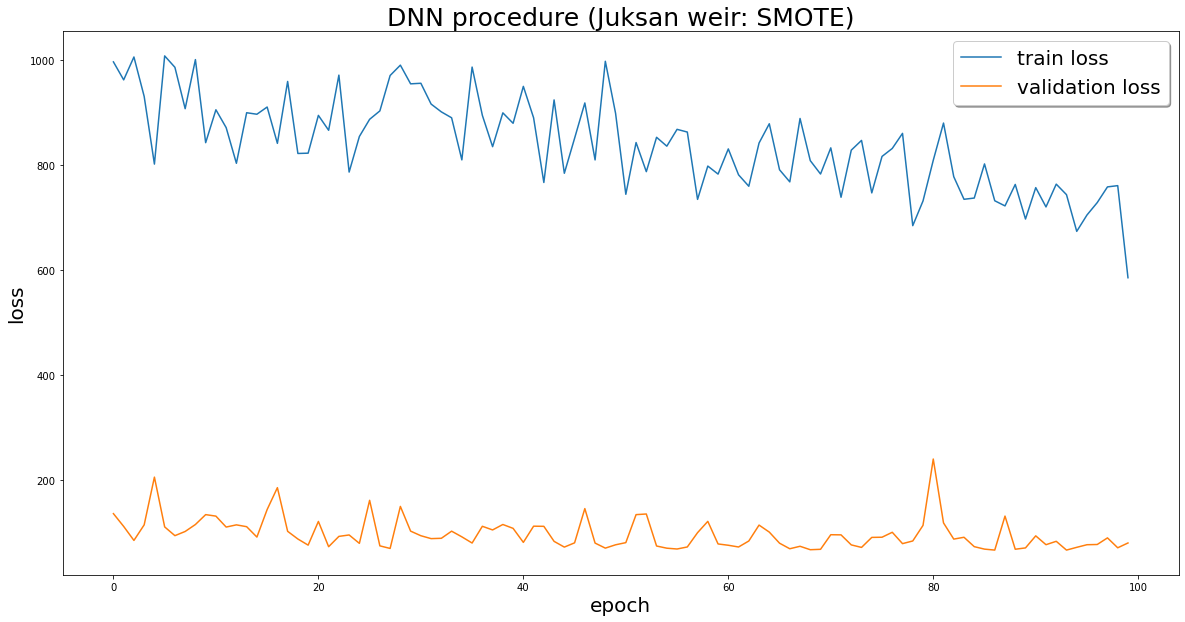

In [124]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Juksan weir: SMOTE)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN JS_SMOTE_python.png')

In [125]:
# ADASYN
hist = model.fit(
    JS_train_x_ads, JS_train_y_ads,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
14/14 - 0s - loss: 624.0468 - mean_squared_error: 624.0468 - mean_absolute_error: 17.5250 - val_loss: 88.2861 - val_mean_squared_error: 88.2861 - val_mean_absolute_error: 7.2209 - 44ms/epoch - 3ms/step
Epoch 2/100
14/14 - 0s - loss: 644.9864 - mean_squared_error: 644.9864 - mean_absolute_error: 17.9008 - val_loss: 113.2207 - val_mean_squared_error: 113.2207 - val_mean_absolute_error: 8.4364 - 25ms/epoch - 2ms/step
Epoch 3/100
14/14 - 0s - loss: 622.9528 - mean_squared_error: 622.9528 - mean_absolute_error: 18.0288 - val_loss: 88.1177 - val_mean_squared_error: 88.1177 - val_mean_absolute_error: 7.0565 - 24ms/epoch - 2ms/step
Epoch 4/100
14/14 - 0s - loss: 654.6727 - mean_squared_error: 654.6727 - mean_absolute_error: 18.1222 - val_loss: 129.8676 - val_mean_squared_error: 129.8676 - val_mean_absolute_error: 9.2255 - 33ms/epoch - 2ms/step
Epoch 5/100
14/14 - 0s - loss: 656.7221 - mean_squared_error: 656.7221 - mean_absolute_error: 18.4185 - val_loss: 169.0254 - val_mean_square

Epoch 39/100
14/14 - 0s - loss: 679.7739 - mean_squared_error: 679.7739 - mean_absolute_error: 18.2690 - val_loss: 75.1647 - val_mean_squared_error: 75.1647 - val_mean_absolute_error: 6.3435 - 25ms/epoch - 2ms/step
Epoch 40/100
14/14 - 0s - loss: 689.2586 - mean_squared_error: 689.2586 - mean_absolute_error: 18.7670 - val_loss: 78.6248 - val_mean_squared_error: 78.6248 - val_mean_absolute_error: 6.5759 - 24ms/epoch - 2ms/step
Epoch 41/100
14/14 - 0s - loss: 723.9761 - mean_squared_error: 723.9761 - mean_absolute_error: 19.1794 - val_loss: 74.8278 - val_mean_squared_error: 74.8278 - val_mean_absolute_error: 6.1319 - 23ms/epoch - 2ms/step
Epoch 42/100
14/14 - 0s - loss: 757.2765 - mean_squared_error: 757.2765 - mean_absolute_error: 18.2424 - val_loss: 74.6193 - val_mean_squared_error: 74.6193 - val_mean_absolute_error: 6.1474 - 24ms/epoch - 2ms/step
Epoch 43/100
14/14 - 0s - loss: 604.5557 - mean_squared_error: 604.5557 - mean_absolute_error: 17.0404 - val_loss: 101.8374 - val_mean_squar

Epoch 77/100
14/14 - 0s - loss: 591.1721 - mean_squared_error: 591.1721 - mean_absolute_error: 16.6017 - val_loss: 71.5144 - val_mean_squared_error: 71.5144 - val_mean_absolute_error: 6.0113 - 24ms/epoch - 2ms/step
Epoch 78/100
14/14 - 0s - loss: 594.9954 - mean_squared_error: 594.9954 - mean_absolute_error: 17.3870 - val_loss: 145.8915 - val_mean_squared_error: 145.8915 - val_mean_absolute_error: 9.8854 - 24ms/epoch - 2ms/step
Epoch 79/100
14/14 - 0s - loss: 645.9531 - mean_squared_error: 645.9531 - mean_absolute_error: 17.5501 - val_loss: 114.7840 - val_mean_squared_error: 114.7840 - val_mean_absolute_error: 8.5621 - 24ms/epoch - 2ms/step
Epoch 80/100
14/14 - 0s - loss: 454.3537 - mean_squared_error: 454.3537 - mean_absolute_error: 15.3160 - val_loss: 127.2360 - val_mean_squared_error: 127.2360 - val_mean_absolute_error: 9.1281 - 23ms/epoch - 2ms/step
Epoch 81/100
14/14 - 0s - loss: 566.1901 - mean_squared_error: 566.1901 - mean_absolute_error: 16.1189 - val_loss: 126.0686 - val_mean

In [126]:
scores = model.evaluate(JS_test_x, JS_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 694.1418 - mean_squared_error: 694.1418 - mean_absolute_error: 16.2912
test_loss:  694.141845703125
test_mae:  694.141845703125


In [127]:
JS_test_y_pred_DNN_ads = model.predict(JS_test_x)
JS_test_y_pred_DNN_ads

2/2 [==============================] - 0s 1ms/step


array([[ 26.17571  ],
       [ 34.64664  ],
       [141.37222  ],
       [ 52.352676 ],
       [ 23.650192 ],
       [ 17.392727 ],
       [ 18.475185 ],
       [ 23.295725 ],
       [ 16.749851 ],
       [ 32.498985 ],
       [ 22.978012 ],
       [ 15.9747505],
       [ 25.017925 ],
       [ 43.077972 ],
       [ 19.291777 ],
       [ 23.830708 ],
       [ 54.61433  ],
       [ 29.021317 ],
       [ 32.475258 ],
       [ 17.927277 ],
       [ 21.877956 ],
       [  9.573256 ],
       [  4.311337 ],
       [  6.202876 ],
       [ 74.25241  ],
       [ 41.152298 ],
       [ 61.963223 ],
       [ 38.581554 ],
       [ 12.456212 ],
       [ 66.390495 ],
       [ 46.925316 ],
       [  7.173771 ],
       [ 11.464921 ],
       [ 43.37121  ],
       [ 58.648964 ],
       [ 78.293655 ],
       [ 37.306625 ],
       [ 28.257318 ],
       [ 27.228024 ],
       [ 14.80526  ],
       [ 15.898727 ],
       [ 20.106031 ],
       [ 13.032951 ],
       [ 18.577314 ],
       [ 32.305046 ]], dtype=flo

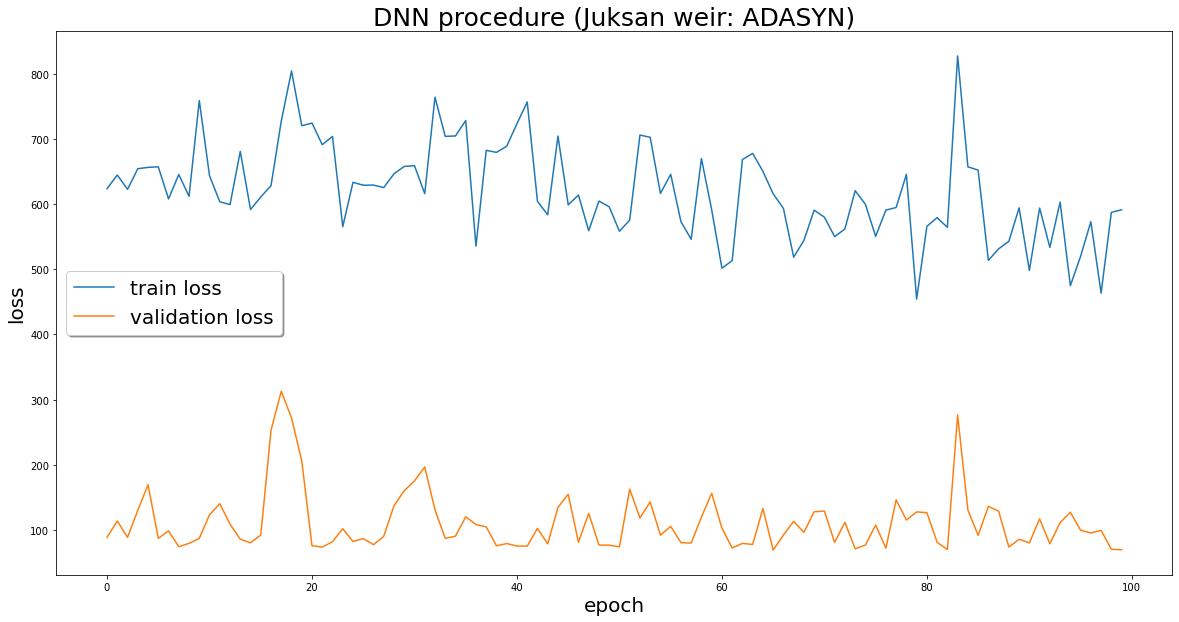

In [128]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Juksan weir: ADASYN)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN JS_ADASYN_python.png')

In [129]:
# SMOTE-ENN
hist = model.fit(
    JS_train_x_sme, JS_train_y_sme,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
6/6 - 0s - loss: 735.3442 - mean_squared_error: 735.3442 - mean_absolute_error: 16.3151 - val_loss: 273.8420 - val_mean_squared_error: 273.8420 - val_mean_absolute_error: 11.7455 - 42ms/epoch - 7ms/step
Epoch 2/100
6/6 - 0s - loss: 660.3179 - mean_squared_error: 660.3179 - mean_absolute_error: 17.1154 - val_loss: 190.9817 - val_mean_squared_error: 190.9817 - val_mean_absolute_error: 10.4858 - 19ms/epoch - 3ms/step
Epoch 3/100
6/6 - 0s - loss: 610.4670 - mean_squared_error: 610.4670 - mean_absolute_error: 14.8946 - val_loss: 211.0799 - val_mean_squared_error: 211.0799 - val_mean_absolute_error: 10.6825 - 20ms/epoch - 3ms/step
Epoch 4/100
6/6 - 0s - loss: 469.4780 - mean_squared_error: 469.4780 - mean_absolute_error: 13.6883 - val_loss: 211.7388 - val_mean_squared_error: 211.7388 - val_mean_absolute_error: 11.1093 - 19ms/epoch - 3ms/step
Epoch 5/100
6/6 - 0s - loss: 573.3086 - mean_squared_error: 573.3086 - mean_absolute_error: 14.2141 - val_loss: 279.6204 - val_mean_squared_

Epoch 39/100
6/6 - 0s - loss: 451.1663 - mean_squared_error: 451.1663 - mean_absolute_error: 13.6990 - val_loss: 213.6549 - val_mean_squared_error: 213.6549 - val_mean_absolute_error: 11.3084 - 21ms/epoch - 4ms/step
Epoch 40/100
6/6 - 0s - loss: 529.1034 - mean_squared_error: 529.1034 - mean_absolute_error: 13.3970 - val_loss: 199.4101 - val_mean_squared_error: 199.4101 - val_mean_absolute_error: 10.9030 - 20ms/epoch - 3ms/step
Epoch 41/100
6/6 - 0s - loss: 422.3683 - mean_squared_error: 422.3683 - mean_absolute_error: 13.4066 - val_loss: 188.4540 - val_mean_squared_error: 188.4540 - val_mean_absolute_error: 10.4661 - 20ms/epoch - 3ms/step
Epoch 42/100
6/6 - 0s - loss: 466.3763 - mean_squared_error: 466.3763 - mean_absolute_error: 13.0333 - val_loss: 202.1145 - val_mean_squared_error: 202.1145 - val_mean_absolute_error: 10.9404 - 19ms/epoch - 3ms/step
Epoch 43/100
6/6 - 0s - loss: 389.0650 - mean_squared_error: 389.0650 - mean_absolute_error: 12.4752 - val_loss: 196.6033 - val_mean_squ

Epoch 77/100
6/6 - 0s - loss: 462.4374 - mean_squared_error: 462.4374 - mean_absolute_error: 12.7087 - val_loss: 213.4402 - val_mean_squared_error: 213.4402 - val_mean_absolute_error: 10.8420 - 20ms/epoch - 3ms/step
Epoch 78/100
6/6 - 0s - loss: 370.8692 - mean_squared_error: 370.8692 - mean_absolute_error: 11.6603 - val_loss: 213.0930 - val_mean_squared_error: 213.0930 - val_mean_absolute_error: 10.9010 - 20ms/epoch - 3ms/step
Epoch 79/100
6/6 - 0s - loss: 453.7013 - mean_squared_error: 453.7013 - mean_absolute_error: 12.6492 - val_loss: 219.3948 - val_mean_squared_error: 219.3948 - val_mean_absolute_error: 11.1000 - 18ms/epoch - 3ms/step
Epoch 80/100
6/6 - 0s - loss: 395.5111 - mean_squared_error: 395.5111 - mean_absolute_error: 12.2664 - val_loss: 210.7382 - val_mean_squared_error: 210.7382 - val_mean_absolute_error: 10.9595 - 20ms/epoch - 3ms/step
Epoch 81/100
6/6 - 0s - loss: 460.0205 - mean_squared_error: 460.0205 - mean_absolute_error: 12.4449 - val_loss: 206.8600 - val_mean_squ

In [130]:
scores = model.evaluate(JS_test_x, JS_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 1009.7476 - mean_squared_error: 1009.7476 - mean_absolute_error: 20.9767
test_loss:  1009.74755859375
test_mae:  1009.74755859375


In [131]:
JS_test_y_pred_DNN_sme = model.predict(JS_test_x)
JS_test_y_pred_DNN_sme

2/2 [==============================] - 0s 1000us/step


array([[ 32.780346 ],
       [ 59.833538 ],
       [165.92871  ],
       [ 82.48949  ],
       [ 32.87191  ],
       [ 18.399778 ],
       [ 19.980185 ],
       [ 25.305153 ],
       [ 16.46915  ],
       [ 30.731441 ],
       [ 22.445135 ],
       [ 15.144172 ],
       [ 22.741804 ],
       [ 51.094852 ],
       [ 22.269966 ],
       [ 28.483376 ],
       [ 74.897545 ],
       [ 34.079662 ],
       [ 37.53112  ],
       [ 21.551449 ],
       [ 21.318443 ],
       [  7.7917953],
       [  7.687073 ],
       [  7.35625  ],
       [ 81.824036 ],
       [ 41.345123 ],
       [ 68.15769  ],
       [ 51.84899  ],
       [ 11.344167 ],
       [ 66.39638  ],
       [ 56.044044 ],
       [  6.2013607],
       [ 11.630681 ],
       [ 51.142593 ],
       [ 67.21111  ],
       [ 95.61894  ],
       [ 53.0517   ],
       [ 30.075705 ],
       [ 42.732555 ],
       [ 13.822623 ],
       [ 15.614667 ],
       [ 16.37858  ],
       [ 11.897993 ],
       [ 29.346073 ],
       [ 34.73298  ]], dtype=flo

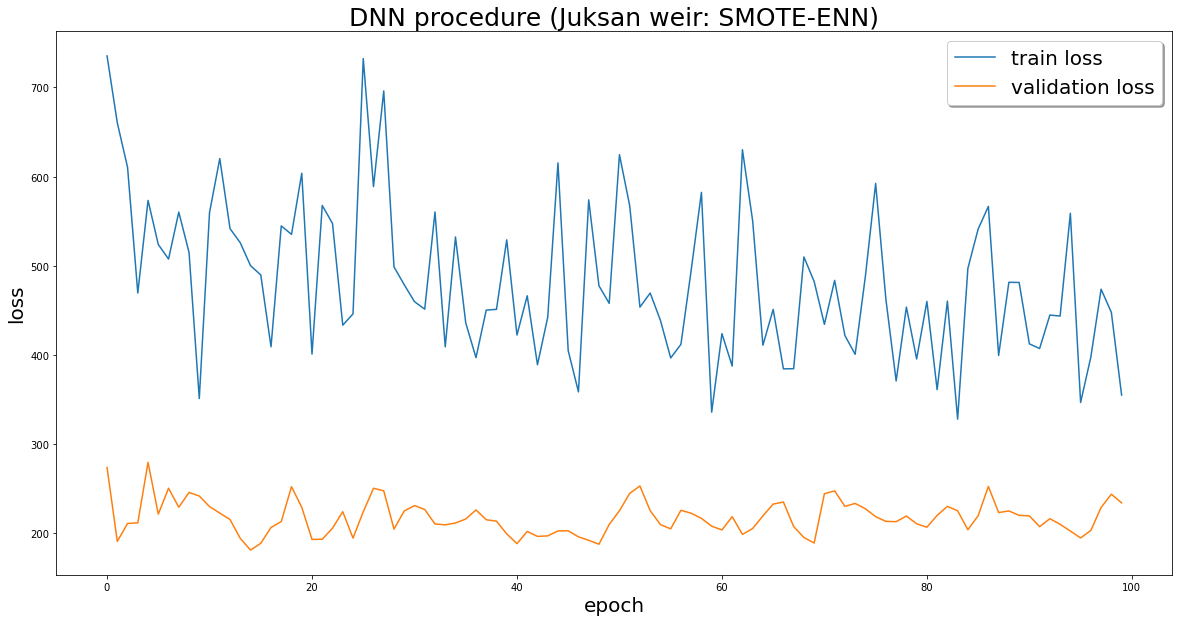

In [132]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Juksan weir: SMOTE-ENN)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN JS_SMOTE-ENN_python.png')

In [133]:
# SMOTE-Tomek
hist = model.fit(
    JS_train_x_smt, JS_train_y_smt,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
13/13 - 0s - loss: 629.6840 - mean_squared_error: 629.6840 - mean_absolute_error: 18.4830 - val_loss: 63.0212 - val_mean_squared_error: 63.0212 - val_mean_absolute_error: 5.8853 - 46ms/epoch - 4ms/step
Epoch 2/100
13/13 - 0s - loss: 616.9763 - mean_squared_error: 616.9763 - mean_absolute_error: 16.8769 - val_loss: 65.3193 - val_mean_squared_error: 65.3193 - val_mean_absolute_error: 6.0198 - 23ms/epoch - 2ms/step
Epoch 3/100
13/13 - 0s - loss: 547.4261 - mean_squared_error: 547.4261 - mean_absolute_error: 16.3949 - val_loss: 90.6112 - val_mean_squared_error: 90.6112 - val_mean_absolute_error: 6.9441 - 22ms/epoch - 2ms/step
Epoch 4/100
13/13 - 0s - loss: 573.5049 - mean_squared_error: 573.5049 - mean_absolute_error: 16.8121 - val_loss: 62.2179 - val_mean_squared_error: 62.2179 - val_mean_absolute_error: 5.5545 - 24ms/epoch - 2ms/step
Epoch 5/100
13/13 - 0s - loss: 575.4940 - mean_squared_error: 575.4940 - mean_absolute_error: 16.5807 - val_loss: 80.1586 - val_mean_squared_err

Epoch 40/100
13/13 - 0s - loss: 592.4650 - mean_squared_error: 592.4650 - mean_absolute_error: 16.9253 - val_loss: 59.0757 - val_mean_squared_error: 59.0757 - val_mean_absolute_error: 5.5726 - 24ms/epoch - 2ms/step
Epoch 41/100
13/13 - 0s - loss: 513.2681 - mean_squared_error: 513.2681 - mean_absolute_error: 16.4662 - val_loss: 58.8438 - val_mean_squared_error: 58.8438 - val_mean_absolute_error: 5.5911 - 22ms/epoch - 2ms/step
Epoch 42/100
13/13 - 0s - loss: 666.2460 - mean_squared_error: 666.2460 - mean_absolute_error: 17.5084 - val_loss: 159.7823 - val_mean_squared_error: 159.7823 - val_mean_absolute_error: 9.1643 - 24ms/epoch - 2ms/step
Epoch 43/100
13/13 - 0s - loss: 601.6304 - mean_squared_error: 601.6304 - mean_absolute_error: 17.6697 - val_loss: 143.5678 - val_mean_squared_error: 143.5678 - val_mean_absolute_error: 8.7608 - 22ms/epoch - 2ms/step
Epoch 44/100
13/13 - 0s - loss: 551.6437 - mean_squared_error: 551.6437 - mean_absolute_error: 16.6408 - val_loss: 94.4481 - val_mean_sq

13/13 - 0s - loss: 503.4993 - mean_squared_error: 503.4993 - mean_absolute_error: 15.2042 - val_loss: 92.5762 - val_mean_squared_error: 92.5762 - val_mean_absolute_error: 6.9222 - 23ms/epoch - 2ms/step
Epoch 79/100
13/13 - 0s - loss: 540.5009 - mean_squared_error: 540.5009 - mean_absolute_error: 16.6775 - val_loss: 85.3389 - val_mean_squared_error: 85.3389 - val_mean_absolute_error: 6.4957 - 24ms/epoch - 2ms/step
Epoch 80/100
13/13 - 0s - loss: 541.3566 - mean_squared_error: 541.3566 - mean_absolute_error: 16.1046 - val_loss: 88.3491 - val_mean_squared_error: 88.3491 - val_mean_absolute_error: 6.5958 - 23ms/epoch - 2ms/step
Epoch 81/100
13/13 - 0s - loss: 490.8325 - mean_squared_error: 490.8325 - mean_absolute_error: 16.2479 - val_loss: 107.1908 - val_mean_squared_error: 107.1908 - val_mean_absolute_error: 7.2052 - 23ms/epoch - 2ms/step
Epoch 82/100
13/13 - 0s - loss: 571.1146 - mean_squared_error: 571.1146 - mean_absolute_error: 16.2389 - val_loss: 73.1480 - val_mean_squared_error: 73

In [134]:
scores = model.evaluate(JS_test_x, JS_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 919.6680 - mean_squared_error: 919.6680 - mean_absolute_error: 20.1034
test_loss:  919.6680297851562
test_mae:  919.6680297851562


In [135]:
JS_test_y_pred_DNN_smt = model.predict(JS_test_x)
JS_test_y_pred_DNN_smt

2/2 [==============================] - 0s 999us/step


array([[ 32.863148 ],
       [ 49.233105 ],
       [167.69473  ],
       [ 66.098076 ],
       [ 35.322014 ],
       [ 20.37694  ],
       [ 20.388882 ],
       [ 36.399193 ],
       [ 19.094091 ],
       [ 41.490597 ],
       [ 31.267248 ],
       [ 18.117132 ],
       [ 24.401623 ],
       [ 48.35463  ],
       [ 28.650171 ],
       [ 29.817312 ],
       [ 72.15176  ],
       [ 36.213753 ],
       [ 41.948044 ],
       [ 22.368034 ],
       [ 17.817106 ],
       [  8.502987 ],
       [  6.345981 ],
       [  6.1154895],
       [ 82.03391  ],
       [ 33.98904  ],
       [ 66.23134  ],
       [ 42.63674  ],
       [ 11.486548 ],
       [ 65.52505  ],
       [ 55.532146 ],
       [  6.7608266],
       [ 11.569673 ],
       [ 53.210743 ],
       [ 65.62576  ],
       [ 89.9558   ],
       [ 45.869053 ],
       [ 35.539272 ],
       [ 46.127117 ],
       [ 21.237595 ],
       [ 23.005991 ],
       [ 27.22603  ],
       [ 18.202446 ],
       [ 32.640656 ],
       [ 39.870995 ]], dtype=flo

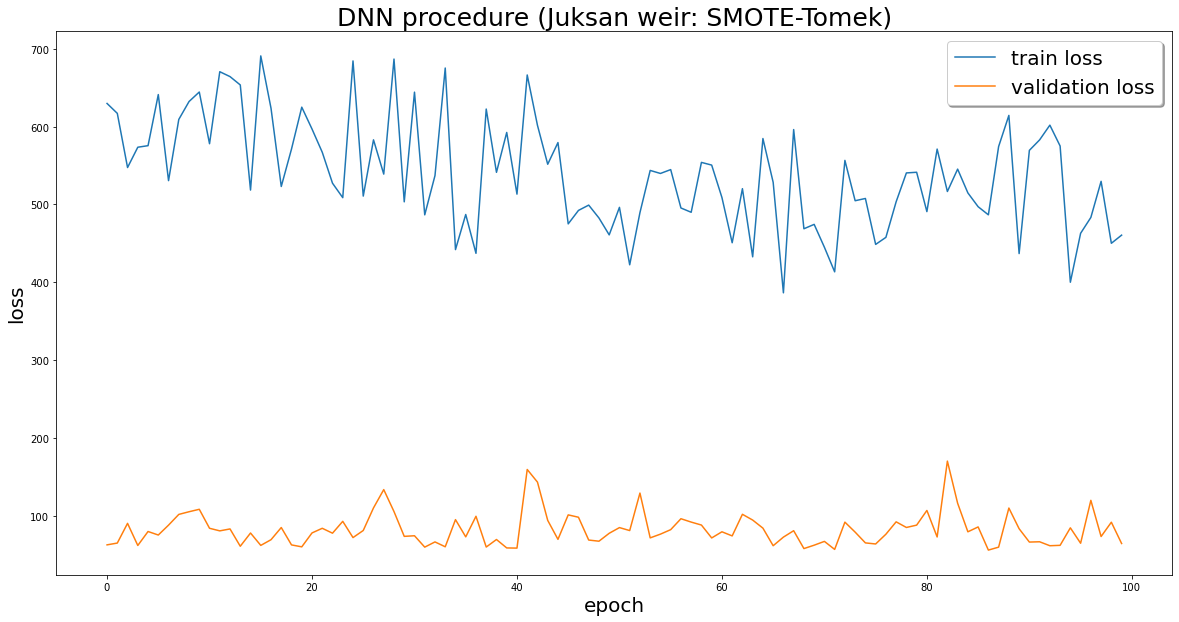

In [136]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Juksan weir: SMOTE-Tomek)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN JS_SMOTE-Tomek_python.png')

In [137]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

In [138]:
# CNN model (JS)
JS_train_x_CNN = JS_train_x.to_numpy().reshape(JS_train_x.shape[0], JS_train_x.shape[1], 1)
JS_train_x_sm_CNN = JS_train_x_sm.to_numpy().reshape(JS_train_x_sm.shape[0], JS_train_x_sm.shape[1], 1) # SMOTE
JS_train_x_ads_CNN = JS_train_x_ads.to_numpy().reshape(JS_train_x_ads.shape[0], JS_train_x_ads.shape[1], 1) # ADASYN
JS_train_x_sme_CNN = JS_train_x_sme.to_numpy().reshape(JS_train_x_sme.shape[0], JS_train_x_sme.shape[1], 1) # SMOTE-ENN
JS_train_x_smt_CNN = JS_train_x_smt.to_numpy().reshape(JS_train_x_smt.shape[0], JS_train_x_smt.shape[1], 1) # SMOTE-Tomek
JS_test_x_CNN = JS_test_x.to_numpy().reshape(JS_test_x.shape[0], JS_test_x.shape[1], 1) 

In [139]:
# model
model = tf.keras.Sequential()  
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(18, 1)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(
        loss='mse',         # mean_squared_error(평균제곱오차)의 alias
        optimizer='adam',   # 최적화 기법 중 하나
        metrics=["mean_squared_error","mean_absolute_error"])    # 실험 후 관찰하고 싶은 metric 들을 나열함.

In [140]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 17, 64)            192       
                                                                 
 conv1d_3 (Conv1D)           (None, 15, 32)            6176      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 7, 32)             0         
 g1D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 7, 32)             0         
                                                                 
 flatten_1 (Flatten)         (None, 224)               0         
                                                                 
 dense_10 (Dense)            (None, 32)                7200      
                                                      

In [141]:
# original
hist = model.fit(
    JS_train_x_CNN, JS_train_y,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
9/9 - 0s - loss: 2167.6670 - mean_squared_error: 2167.6670 - mean_absolute_error: 33.5771 - val_loss: 1310.1222 - val_mean_squared_error: 1310.1222 - val_mean_absolute_error: 30.0142 - 452ms/epoch - 50ms/step
Epoch 2/100
9/9 - 0s - loss: 1839.9810 - mean_squared_error: 1839.9810 - mean_absolute_error: 32.0269 - val_loss: 1117.9379 - val_mean_squared_error: 1117.9379 - val_mean_absolute_error: 27.3243 - 32ms/epoch - 4ms/step
Epoch 3/100
9/9 - 0s - loss: 1938.6649 - mean_squared_error: 1938.6649 - mean_absolute_error: 31.6219 - val_loss: 1117.4399 - val_mean_squared_error: 1117.4399 - val_mean_absolute_error: 27.3059 - 28ms/epoch - 3ms/step
Epoch 4/100
9/9 - 0s - loss: 1771.1956 - mean_squared_error: 1771.1956 - mean_absolute_error: 31.3346 - val_loss: 1167.9811 - val_mean_squared_error: 1167.9811 - val_mean_absolute_error: 28.1002 - 28ms/epoch - 3ms/step
Epoch 5/100
9/9 - 0s - loss: 1846.7954 - mean_squared_error: 1846.7954 - mean_absolute_error: 30.8969 - val_loss: 1101.327

Epoch 39/100
9/9 - 0s - loss: 1152.5762 - mean_squared_error: 1152.5762 - mean_absolute_error: 23.9833 - val_loss: 658.6849 - val_mean_squared_error: 658.6849 - val_mean_absolute_error: 20.5500 - 27ms/epoch - 3ms/step
Epoch 40/100
9/9 - 0s - loss: 1169.1060 - mean_squared_error: 1169.1060 - mean_absolute_error: 22.8839 - val_loss: 786.1683 - val_mean_squared_error: 786.1683 - val_mean_absolute_error: 23.4318 - 27ms/epoch - 3ms/step
Epoch 41/100
9/9 - 0s - loss: 1123.3718 - mean_squared_error: 1123.3718 - mean_absolute_error: 24.0641 - val_loss: 705.2886 - val_mean_squared_error: 705.2886 - val_mean_absolute_error: 21.5916 - 26ms/epoch - 3ms/step
Epoch 42/100
9/9 - 0s - loss: 1064.9661 - mean_squared_error: 1064.9661 - mean_absolute_error: 23.4329 - val_loss: 722.6229 - val_mean_squared_error: 722.6229 - val_mean_absolute_error: 22.0018 - 26ms/epoch - 3ms/step
Epoch 43/100
9/9 - 0s - loss: 1107.8424 - mean_squared_error: 1107.8424 - mean_absolute_error: 23.4962 - val_loss: 652.0706 - va

Epoch 77/100
9/9 - 0s - loss: 886.7265 - mean_squared_error: 886.7265 - mean_absolute_error: 21.1077 - val_loss: 600.4333 - val_mean_squared_error: 600.4333 - val_mean_absolute_error: 19.2317 - 26ms/epoch - 3ms/step
Epoch 78/100
9/9 - 0s - loss: 929.4410 - mean_squared_error: 929.4410 - mean_absolute_error: 21.6027 - val_loss: 660.4032 - val_mean_squared_error: 660.4032 - val_mean_absolute_error: 20.3468 - 26ms/epoch - 3ms/step
Epoch 79/100
9/9 - 0s - loss: 898.5261 - mean_squared_error: 898.5261 - mean_absolute_error: 20.2783 - val_loss: 591.6917 - val_mean_squared_error: 591.6917 - val_mean_absolute_error: 19.0045 - 26ms/epoch - 3ms/step
Epoch 80/100
9/9 - 0s - loss: 896.5226 - mean_squared_error: 896.5226 - mean_absolute_error: 21.3869 - val_loss: 600.2365 - val_mean_squared_error: 600.2365 - val_mean_absolute_error: 19.0539 - 26ms/epoch - 3ms/step
Epoch 81/100
9/9 - 0s - loss: 842.2551 - mean_squared_error: 842.2551 - mean_absolute_error: 19.8642 - val_loss: 755.6398 - val_mean_squ

In [142]:
scores = model.evaluate(JS_test_x_CNN, JS_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 818.9445 - mean_squared_error: 818.9445 - mean_absolute_error: 21.2361
test_loss:  818.9445190429688
test_mae:  818.9445190429688


In [143]:
JS_test_y_pred_CNN = model.predict(JS_test_x_CNN)
JS_test_y_pred_CNN

2/2 [==============================] - 0s 1000us/step


array([[ 44.14446 ],
       [ 69.14742 ],
       [118.27824 ],
       [ 71.46852 ],
       [ 44.487793],
       [ 31.61218 ],
       [ 36.212246],
       [ 46.598587],
       [ 29.51824 ],
       [ 42.39614 ],
       [ 32.487843],
       [ 25.061026],
       [ 30.866419],
       [ 68.41042 ],
       [ 55.2176  ],
       [ 20.689674],
       [ 58.295948],
       [ 46.48176 ],
       [ 83.41588 ],
       [ 24.74504 ],
       [ 25.337402],
       [ 14.43575 ],
       [  6.58123 ],
       [  7.036565],
       [ 54.460163],
       [ 20.610003],
       [ 55.37911 ],
       [ 32.700687],
       [ 15.350733],
       [ 49.286354],
       [ 36.53503 ],
       [  9.476355],
       [ 26.531994],
       [ 59.12702 ],
       [ 76.15799 ],
       [ 97.21037 ],
       [ 78.25893 ],
       [ 51.834946],
       [ 30.930744],
       [ 30.552908],
       [ 21.498594],
       [ 21.35642 ],
       [ 16.113235],
       [ 19.553354],
       [ 40.14781 ]], dtype=float32)

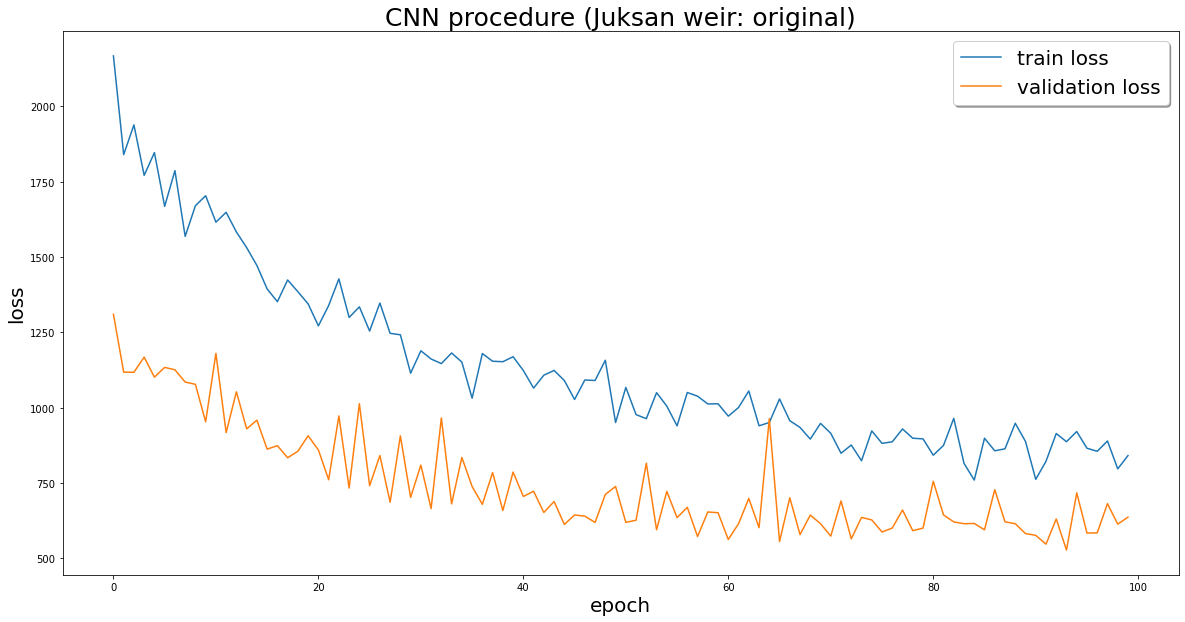

In [144]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Juksan weir: original)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN JS_python.png')

In [145]:
# SMOTE
hist = model.fit(
    JS_train_x_sm_CNN, JS_train_y_sm,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
14/14 - 0s - loss: 830.4327 - mean_squared_error: 830.4327 - mean_absolute_error: 20.6540 - val_loss: 274.5454 - val_mean_squared_error: 274.5454 - val_mean_absolute_error: 12.3437 - 52ms/epoch - 4ms/step
Epoch 2/100
14/14 - 0s - loss: 844.9220 - mean_squared_error: 844.9220 - mean_absolute_error: 20.8892 - val_loss: 202.2773 - val_mean_squared_error: 202.2773 - val_mean_absolute_error: 10.5582 - 33ms/epoch - 2ms/step
Epoch 3/100
14/14 - 0s - loss: 848.2194 - mean_squared_error: 848.2194 - mean_absolute_error: 20.1022 - val_loss: 219.0852 - val_mean_squared_error: 219.0852 - val_mean_absolute_error: 10.8632 - 34ms/epoch - 2ms/step
Epoch 4/100
14/14 - 0s - loss: 858.5564 - mean_squared_error: 858.5564 - mean_absolute_error: 21.1912 - val_loss: 131.9715 - val_mean_squared_error: 131.9715 - val_mean_absolute_error: 9.2324 - 33ms/epoch - 2ms/step
Epoch 5/100
14/14 - 0s - loss: 855.7990 - mean_squared_error: 855.7990 - mean_absolute_error: 20.9659 - val_loss: 189.2192 - val_mean

Epoch 39/100
14/14 - 0s - loss: 764.9553 - mean_squared_error: 764.9553 - mean_absolute_error: 19.5239 - val_loss: 138.3324 - val_mean_squared_error: 138.3324 - val_mean_absolute_error: 9.3968 - 32ms/epoch - 2ms/step
Epoch 40/100
14/14 - 0s - loss: 691.6506 - mean_squared_error: 691.6506 - mean_absolute_error: 18.8904 - val_loss: 174.0036 - val_mean_squared_error: 174.0036 - val_mean_absolute_error: 10.2170 - 32ms/epoch - 2ms/step
Epoch 41/100
14/14 - 0s - loss: 768.4814 - mean_squared_error: 768.4814 - mean_absolute_error: 19.9246 - val_loss: 262.8489 - val_mean_squared_error: 262.8489 - val_mean_absolute_error: 12.5222 - 32ms/epoch - 2ms/step
Epoch 42/100
14/14 - 0s - loss: 751.9616 - mean_squared_error: 751.9616 - mean_absolute_error: 19.4333 - val_loss: 179.6841 - val_mean_squared_error: 179.6841 - val_mean_absolute_error: 10.3113 - 34ms/epoch - 2ms/step
Epoch 43/100
14/14 - 0s - loss: 694.5548 - mean_squared_error: 694.5548 - mean_absolute_error: 19.3910 - val_loss: 116.4193 - val

Epoch 77/100
14/14 - 0s - loss: 684.0023 - mean_squared_error: 684.0023 - mean_absolute_error: 18.8299 - val_loss: 163.2482 - val_mean_squared_error: 163.2482 - val_mean_absolute_error: 9.9434 - 32ms/epoch - 2ms/step
Epoch 78/100
14/14 - 0s - loss: 703.5239 - mean_squared_error: 703.5239 - mean_absolute_error: 18.5393 - val_loss: 183.1334 - val_mean_squared_error: 183.1334 - val_mean_absolute_error: 10.5619 - 32ms/epoch - 2ms/step
Epoch 79/100
14/14 - 0s - loss: 655.9540 - mean_squared_error: 655.9540 - mean_absolute_error: 18.0297 - val_loss: 142.9914 - val_mean_squared_error: 142.9914 - val_mean_absolute_error: 9.3944 - 32ms/epoch - 2ms/step
Epoch 80/100
14/14 - 0s - loss: 632.4166 - mean_squared_error: 632.4166 - mean_absolute_error: 18.3921 - val_loss: 163.3421 - val_mean_squared_error: 163.3421 - val_mean_absolute_error: 9.8974 - 32ms/epoch - 2ms/step
Epoch 81/100
14/14 - 0s - loss: 650.4067 - mean_squared_error: 650.4067 - mean_absolute_error: 18.0604 - val_loss: 134.0301 - val_m

In [146]:
scores = model.evaluate(JS_test_x_CNN, JS_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 788.2891 - mean_squared_error: 788.2891 - mean_absolute_error: 18.1285
test_loss:  788.2890625
test_mae:  788.2890625


In [147]:
JS_test_y_pred_CNN_sm = model.predict(JS_test_x_CNN)
JS_test_y_pred_CNN_sm

2/2 [==============================] - 0s 2ms/step


array([[ 36.892212 ],
       [ 53.72475  ],
       [150.92911  ],
       [ 80.416626 ],
       [ 35.10242  ],
       [ 22.29931  ],
       [ 23.106764 ],
       [ 42.38213  ],
       [ 26.704576 ],
       [ 29.929193 ],
       [ 24.297512 ],
       [ 21.433456 ],
       [ 31.818464 ],
       [ 70.35082  ],
       [ 38.907253 ],
       [ 22.635723 ],
       [ 49.441376 ],
       [ 35.43824  ],
       [ 67.69759  ],
       [ 28.38584  ],
       [ 20.96173  ],
       [ 14.780706 ],
       [  6.0319567],
       [  4.415347 ],
       [ 59.94469  ],
       [ 29.36161  ],
       [ 56.797543 ],
       [ 28.427946 ],
       [ 17.993425 ],
       [ 58.108776 ],
       [ 35.080555 ],
       [ 10.090261 ],
       [ 22.056559 ],
       [ 44.56486  ],
       [ 63.151047 ],
       [103.1394   ],
       [ 61.029808 ],
       [ 31.026    ],
       [ 28.221342 ],
       [ 18.72649  ],
       [ 15.802414 ],
       [ 18.261919 ],
       [ 13.100328 ],
       [ 21.536642 ],
       [ 33.444843 ]], dtype=flo

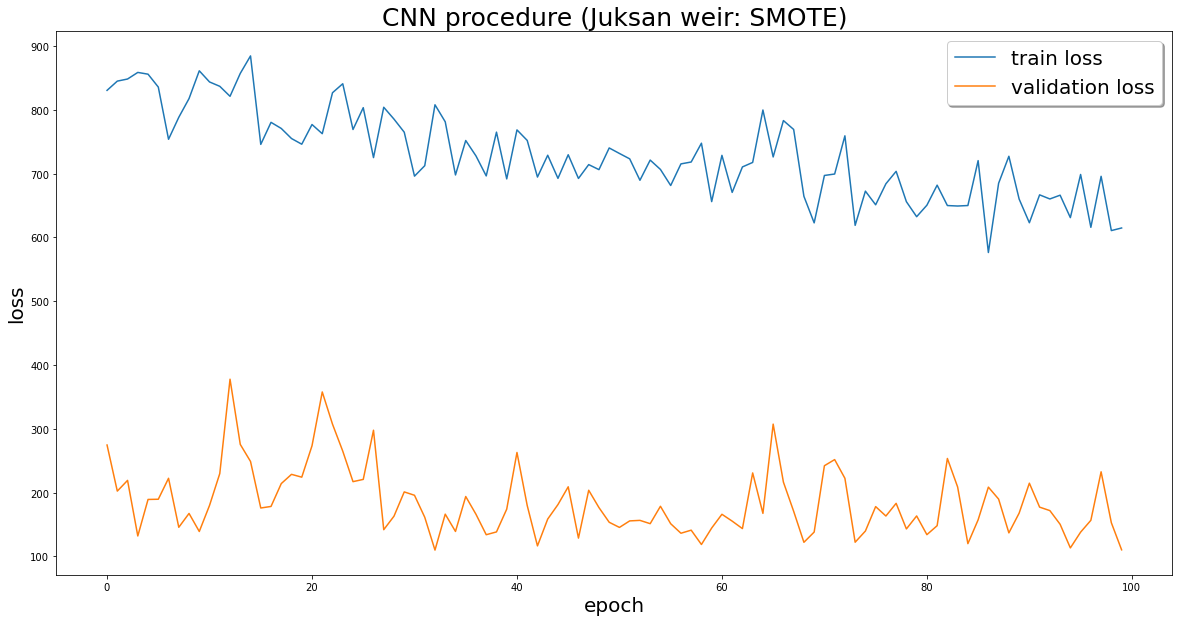

In [148]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Juksan weir: SMOTE)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN JS_SMOTE_python.png')

In [149]:
# ADASYN
hist = model.fit(
    JS_train_x_ads_CNN, JS_train_y_ads,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
14/14 - 0s - loss: 560.7382 - mean_squared_error: 560.7382 - mean_absolute_error: 17.4686 - val_loss: 99.1231 - val_mean_squared_error: 99.1231 - val_mean_absolute_error: 7.3131 - 50ms/epoch - 4ms/step
Epoch 2/100
14/14 - 0s - loss: 577.5057 - mean_squared_error: 577.5057 - mean_absolute_error: 17.1070 - val_loss: 115.0898 - val_mean_squared_error: 115.0898 - val_mean_absolute_error: 7.7254 - 35ms/epoch - 2ms/step
Epoch 3/100
14/14 - 0s - loss: 561.1880 - mean_squared_error: 561.1880 - mean_absolute_error: 16.6828 - val_loss: 113.7782 - val_mean_squared_error: 113.7782 - val_mean_absolute_error: 7.6947 - 34ms/epoch - 2ms/step
Epoch 4/100
14/14 - 0s - loss: 580.2429 - mean_squared_error: 580.2429 - mean_absolute_error: 17.4653 - val_loss: 121.6371 - val_mean_squared_error: 121.6371 - val_mean_absolute_error: 8.0095 - 32ms/epoch - 2ms/step
Epoch 5/100
14/14 - 0s - loss: 541.1537 - mean_squared_error: 541.1537 - mean_absolute_error: 16.8134 - val_loss: 110.5112 - val_mean_squa

Epoch 39/100
14/14 - 0s - loss: 529.5161 - mean_squared_error: 529.5161 - mean_absolute_error: 16.9912 - val_loss: 87.7575 - val_mean_squared_error: 87.7575 - val_mean_absolute_error: 6.8960 - 32ms/epoch - 2ms/step
Epoch 40/100
14/14 - 0s - loss: 544.2247 - mean_squared_error: 544.2247 - mean_absolute_error: 17.0501 - val_loss: 96.6442 - val_mean_squared_error: 96.6442 - val_mean_absolute_error: 7.1369 - 32ms/epoch - 2ms/step
Epoch 41/100
14/14 - 0s - loss: 601.2066 - mean_squared_error: 601.2066 - mean_absolute_error: 17.6070 - val_loss: 91.5790 - val_mean_squared_error: 91.5790 - val_mean_absolute_error: 7.0126 - 34ms/epoch - 2ms/step
Epoch 42/100
14/14 - 0s - loss: 640.7464 - mean_squared_error: 640.7464 - mean_absolute_error: 18.3208 - val_loss: 163.5493 - val_mean_squared_error: 163.5493 - val_mean_absolute_error: 9.8768 - 33ms/epoch - 2ms/step
Epoch 43/100
14/14 - 0s - loss: 536.6766 - mean_squared_error: 536.6766 - mean_absolute_error: 17.0400 - val_loss: 154.0085 - val_mean_squ

Epoch 77/100
14/14 - 0s - loss: 514.9981 - mean_squared_error: 514.9981 - mean_absolute_error: 16.6842 - val_loss: 94.7951 - val_mean_squared_error: 94.7951 - val_mean_absolute_error: 7.0375 - 33ms/epoch - 2ms/step
Epoch 78/100
14/14 - 0s - loss: 478.1198 - mean_squared_error: 478.1198 - mean_absolute_error: 15.8712 - val_loss: 149.0606 - val_mean_squared_error: 149.0606 - val_mean_absolute_error: 9.2586 - 33ms/epoch - 2ms/step
Epoch 79/100
14/14 - 0s - loss: 568.0051 - mean_squared_error: 568.0051 - mean_absolute_error: 17.2586 - val_loss: 129.8472 - val_mean_squared_error: 129.8472 - val_mean_absolute_error: 8.6219 - 32ms/epoch - 2ms/step
Epoch 80/100
14/14 - 0s - loss: 530.6196 - mean_squared_error: 530.6196 - mean_absolute_error: 16.7919 - val_loss: 85.2983 - val_mean_squared_error: 85.2983 - val_mean_absolute_error: 6.8593 - 32ms/epoch - 2ms/step
Epoch 81/100
14/14 - 0s - loss: 508.1884 - mean_squared_error: 508.1884 - mean_absolute_error: 16.2971 - val_loss: 77.8053 - val_mean_sq

In [150]:
scores = model.evaluate(JS_test_x_CNN, JS_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 878.9998 - mean_squared_error: 878.9998 - mean_absolute_error: 20.4651
test_loss:  878.999755859375
test_mae:  878.999755859375


In [151]:
JS_test_y_pred_CNN_ads = model.predict(JS_test_x_CNN)
JS_test_y_pred_CNN_ads

2/2 [==============================] - 0s 1000us/step


array([[ 40.461708 ],
       [ 47.466084 ],
       [161.95071  ],
       [ 76.64192  ],
       [ 38.11377  ],
       [ 26.296745 ],
       [ 24.964231 ],
       [ 50.730106 ],
       [ 33.467827 ],
       [ 36.74933  ],
       [ 30.271423 ],
       [ 26.143692 ],
       [ 36.74455  ],
       [ 71.43455  ],
       [ 40.33849  ],
       [ 25.17395  ],
       [ 56.242588 ],
       [ 41.521503 ],
       [ 66.40215  ],
       [ 27.17376  ],
       [ 24.948467 ],
       [ 13.058932 ],
       [  7.5803795],
       [  6.526865 ],
       [ 67.075294 ],
       [ 37.962284 ],
       [ 62.815575 ],
       [ 33.678307 ],
       [ 15.366801 ],
       [ 71.18061  ],
       [ 42.86158  ],
       [ 13.41287  ],
       [ 25.372929 ],
       [ 47.081535 ],
       [ 63.650883 ],
       [104.1447   ],
       [ 56.75372  ],
       [ 34.730667 ],
       [ 31.336185 ],
       [ 20.2378   ],
       [ 20.108295 ],
       [ 24.795502 ],
       [ 18.749163 ],
       [ 27.648438 ],
       [ 33.47195  ]], dtype=flo

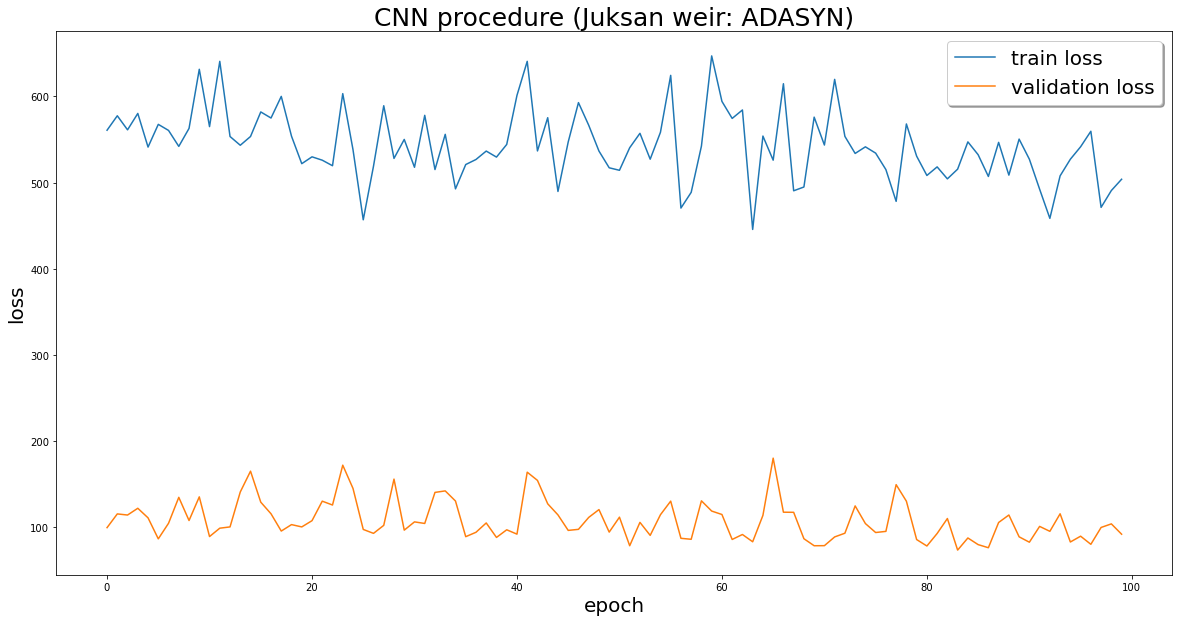

In [152]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Juksan weir: ADASYN)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN JS_ADASYN_python.png')

In [153]:
# SMOTE-ENN
hist = model.fit(
    JS_train_x_sme_CNN, JS_train_y_sme,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
6/6 - 0s - loss: 484.2182 - mean_squared_error: 484.2182 - mean_absolute_error: 15.4810 - val_loss: 223.4325 - val_mean_squared_error: 223.4325 - val_mean_absolute_error: 10.7079 - 44ms/epoch - 7ms/step
Epoch 2/100
6/6 - 0s - loss: 450.9106 - mean_squared_error: 450.9106 - mean_absolute_error: 15.2594 - val_loss: 227.0567 - val_mean_squared_error: 227.0567 - val_mean_absolute_error: 10.9249 - 24ms/epoch - 4ms/step
Epoch 3/100
6/6 - 0s - loss: 462.3221 - mean_squared_error: 462.3221 - mean_absolute_error: 14.8005 - val_loss: 219.6506 - val_mean_squared_error: 219.6506 - val_mean_absolute_error: 10.5679 - 24ms/epoch - 4ms/step
Epoch 4/100
6/6 - 0s - loss: 551.6594 - mean_squared_error: 551.6594 - mean_absolute_error: 15.1441 - val_loss: 226.4045 - val_mean_squared_error: 226.4045 - val_mean_absolute_error: 10.7029 - 24ms/epoch - 4ms/step
Epoch 5/100
6/6 - 0s - loss: 384.3010 - mean_squared_error: 384.3010 - mean_absolute_error: 14.0838 - val_loss: 242.0645 - val_mean_squared_

Epoch 39/100
6/6 - 0s - loss: 404.1929 - mean_squared_error: 404.1929 - mean_absolute_error: 12.7455 - val_loss: 193.0583 - val_mean_squared_error: 193.0583 - val_mean_absolute_error: 9.9629 - 23ms/epoch - 4ms/step
Epoch 40/100
6/6 - 0s - loss: 361.8088 - mean_squared_error: 361.8088 - mean_absolute_error: 13.1681 - val_loss: 190.6593 - val_mean_squared_error: 190.6593 - val_mean_absolute_error: 9.8363 - 22ms/epoch - 4ms/step
Epoch 41/100
6/6 - 0s - loss: 402.8369 - mean_squared_error: 402.8369 - mean_absolute_error: 13.2045 - val_loss: 199.5182 - val_mean_squared_error: 199.5182 - val_mean_absolute_error: 9.9371 - 25ms/epoch - 4ms/step
Epoch 42/100
6/6 - 0s - loss: 367.5255 - mean_squared_error: 367.5255 - mean_absolute_error: 12.8719 - val_loss: 206.1158 - val_mean_squared_error: 206.1158 - val_mean_absolute_error: 10.0652 - 22ms/epoch - 4ms/step
Epoch 43/100
6/6 - 0s - loss: 342.8506 - mean_squared_error: 342.8506 - mean_absolute_error: 12.4319 - val_loss: 199.0381 - val_mean_square

Epoch 77/100
6/6 - 0s - loss: 420.6943 - mean_squared_error: 420.6943 - mean_absolute_error: 12.8043 - val_loss: 203.7141 - val_mean_squared_error: 203.7141 - val_mean_absolute_error: 9.9530 - 22ms/epoch - 4ms/step
Epoch 78/100
6/6 - 0s - loss: 397.2638 - mean_squared_error: 397.2638 - mean_absolute_error: 13.6209 - val_loss: 209.8934 - val_mean_squared_error: 209.8934 - val_mean_absolute_error: 9.8217 - 23ms/epoch - 4ms/step
Epoch 79/100
6/6 - 0s - loss: 327.7680 - mean_squared_error: 327.7680 - mean_absolute_error: 12.5235 - val_loss: 206.6024 - val_mean_squared_error: 206.6024 - val_mean_absolute_error: 9.9577 - 22ms/epoch - 4ms/step
Epoch 80/100
6/6 - 0s - loss: 370.5309 - mean_squared_error: 370.5309 - mean_absolute_error: 12.5426 - val_loss: 218.5275 - val_mean_squared_error: 218.5275 - val_mean_absolute_error: 10.1503 - 23ms/epoch - 4ms/step
Epoch 81/100
6/6 - 0s - loss: 380.9740 - mean_squared_error: 380.9740 - mean_absolute_error: 13.3217 - val_loss: 219.1152 - val_mean_square

In [154]:
scores = model.evaluate(JS_test_x_CNN, JS_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 971.0345 - mean_squared_error: 971.0345 - mean_absolute_error: 20.6599
test_loss:  971.0345458984375
test_mae:  971.0345458984375


In [155]:
JS_test_y_pred_CNN_sme = model.predict(JS_test_x_CNN)
JS_test_y_pred_CNN_sme

2/2 [==============================] - 0s 1ms/step


array([[ 39.318592 ],
       [ 53.51745  ],
       [167.64241  ],
       [102.985016 ],
       [ 39.56498  ],
       [ 30.296589 ],
       [ 27.57272  ],
       [ 45.66083  ],
       [ 30.943378 ],
       [ 35.959618 ],
       [ 26.945377 ],
       [ 24.15924  ],
       [ 26.887987 ],
       [ 67.04628  ],
       [ 33.73242  ],
       [ 16.02169  ],
       [ 72.766495 ],
       [ 36.973484 ],
       [ 69.93454  ],
       [ 13.912996 ],
       [ 18.232777 ],
       [  5.8470902],
       [  7.5576463],
       [  4.554414 ],
       [ 61.305115 ],
       [ 26.277029 ],
       [ 62.943024 ],
       [ 37.923607 ],
       [  5.9809866],
       [ 68.00106  ],
       [ 48.166267 ],
       [  5.948092 ],
       [ 12.922333 ],
       [ 46.10492  ],
       [ 66.60317  ],
       [102.22658  ],
       [ 57.011612 ],
       [ 35.333965 ],
       [ 26.581856 ],
       [ 19.753944 ],
       [ 17.810268 ],
       [ 21.773666 ],
       [ 17.77921  ],
       [ 20.39055  ],
       [ 30.803204 ]], dtype=flo

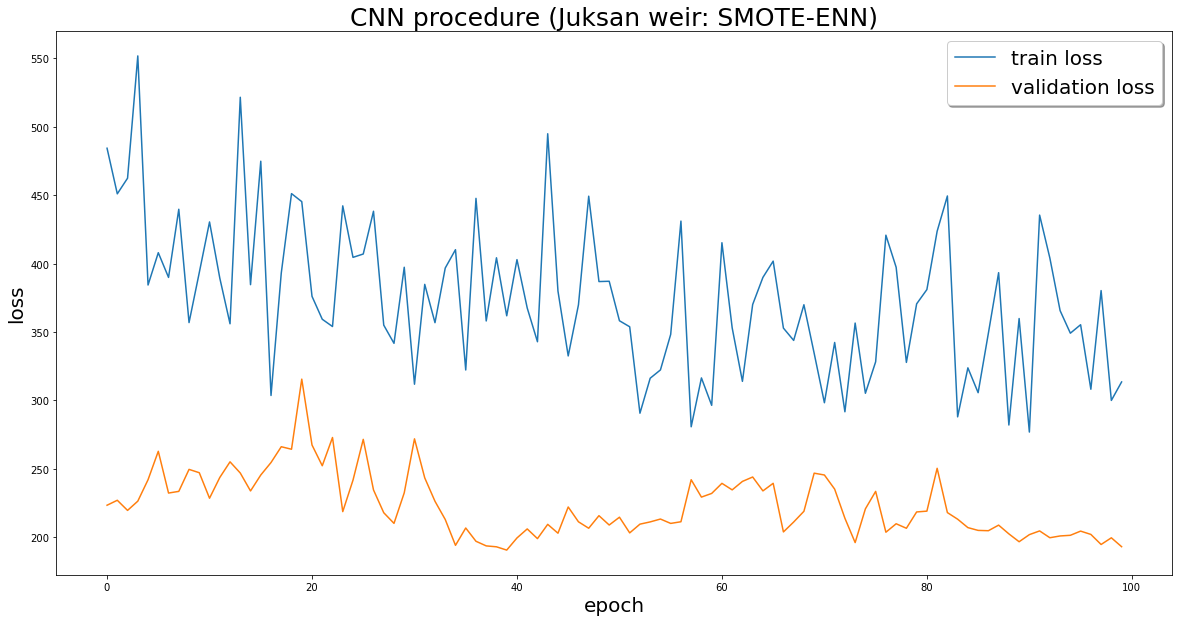

In [156]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Juksan weir: SMOTE-ENN)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN JS_SMOTE_ENN_python.png')

In [157]:
# SMOTE-Tomek
hist = model.fit(
    JS_train_x_smt_CNN, JS_train_y_smt,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
13/13 - 0s - loss: 558.7233 - mean_squared_error: 558.7233 - mean_absolute_error: 17.6108 - val_loss: 70.5325 - val_mean_squared_error: 70.5325 - val_mean_absolute_error: 6.4129 - 52ms/epoch - 4ms/step
Epoch 2/100
13/13 - 0s - loss: 555.7037 - mean_squared_error: 555.7037 - mean_absolute_error: 16.8407 - val_loss: 73.1075 - val_mean_squared_error: 73.1075 - val_mean_absolute_error: 6.9014 - 32ms/epoch - 2ms/step
Epoch 3/100
13/13 - 0s - loss: 628.6537 - mean_squared_error: 628.6537 - mean_absolute_error: 18.0552 - val_loss: 70.3711 - val_mean_squared_error: 70.3711 - val_mean_absolute_error: 6.7480 - 31ms/epoch - 2ms/step
Epoch 4/100
13/13 - 0s - loss: 696.2697 - mean_squared_error: 696.2697 - mean_absolute_error: 19.3271 - val_loss: 103.5393 - val_mean_squared_error: 103.5393 - val_mean_absolute_error: 8.1624 - 32ms/epoch - 2ms/step
Epoch 5/100
13/13 - 0s - loss: 680.0863 - mean_squared_error: 680.0863 - mean_absolute_error: 18.5721 - val_loss: 136.0006 - val_mean_squared_

13/13 - 0s - loss: 510.7905 - mean_squared_error: 510.7905 - mean_absolute_error: 15.8735 - val_loss: 94.8736 - val_mean_squared_error: 94.8736 - val_mean_absolute_error: 7.9826 - 32ms/epoch - 2ms/step
Epoch 40/100
13/13 - 0s - loss: 523.5494 - mean_squared_error: 523.5494 - mean_absolute_error: 17.3955 - val_loss: 95.4489 - val_mean_squared_error: 95.4489 - val_mean_absolute_error: 8.0829 - 31ms/epoch - 2ms/step
Epoch 41/100
13/13 - 0s - loss: 527.4288 - mean_squared_error: 527.4288 - mean_absolute_error: 16.7026 - val_loss: 71.5791 - val_mean_squared_error: 71.5791 - val_mean_absolute_error: 6.8520 - 32ms/epoch - 2ms/step
Epoch 42/100
13/13 - 0s - loss: 521.0670 - mean_squared_error: 521.0670 - mean_absolute_error: 17.0745 - val_loss: 70.3498 - val_mean_squared_error: 70.3498 - val_mean_absolute_error: 6.8053 - 31ms/epoch - 2ms/step
Epoch 43/100
13/13 - 0s - loss: 494.0815 - mean_squared_error: 494.0815 - mean_absolute_error: 16.3141 - val_loss: 75.2853 - val_mean_squared_error: 75.2

Epoch 78/100
13/13 - 0s - loss: 507.0438 - mean_squared_error: 507.0438 - mean_absolute_error: 16.1872 - val_loss: 73.2998 - val_mean_squared_error: 73.2998 - val_mean_absolute_error: 6.6994 - 31ms/epoch - 2ms/step
Epoch 79/100
13/13 - 0s - loss: 475.4445 - mean_squared_error: 475.4445 - mean_absolute_error: 16.2882 - val_loss: 89.3954 - val_mean_squared_error: 89.3954 - val_mean_absolute_error: 7.6571 - 31ms/epoch - 2ms/step
Epoch 80/100
13/13 - 0s - loss: 561.1409 - mean_squared_error: 561.1409 - mean_absolute_error: 17.4017 - val_loss: 79.5275 - val_mean_squared_error: 79.5275 - val_mean_absolute_error: 7.2460 - 31ms/epoch - 2ms/step
Epoch 81/100
13/13 - 0s - loss: 476.9663 - mean_squared_error: 476.9663 - mean_absolute_error: 16.7408 - val_loss: 78.4680 - val_mean_squared_error: 78.4680 - val_mean_absolute_error: 7.2197 - 31ms/epoch - 2ms/step
Epoch 82/100
13/13 - 0s - loss: 471.8282 - mean_squared_error: 471.8282 - mean_absolute_error: 15.3666 - val_loss: 125.0513 - val_mean_squar

In [158]:
scores = model.evaluate(JS_test_x_CNN, JS_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 3ms/step - loss: 1072.2776 - mean_squared_error: 1072.2776 - mean_absolute_error: 21.7706
test_loss:  1072.277587890625
test_mae:  1072.277587890625


In [159]:
JS_test_y_pred_CNN_smt = model.predict(JS_test_x_CNN)
JS_test_y_pred_CNN_smt

2/2 [==============================] - 0s 1000us/step


array([[ 45.093838],
       [ 48.22578 ],
       [183.33614 ],
       [ 86.26421 ],
       [ 39.412914],
       [ 28.722565],
       [ 28.176928],
       [ 59.737854],
       [ 39.132263],
       [ 40.001854],
       [ 34.037   ],
       [ 30.877924],
       [ 39.262455],
       [ 71.01882 ],
       [ 32.60688 ],
       [ 20.504536],
       [ 69.70762 ],
       [ 40.168335],
       [ 61.782314],
       [ 20.258512],
       [ 24.185745],
       [  7.296644],
       [  5.820979],
       [  5.913368],
       [ 65.46988 ],
       [ 32.645176],
       [ 76.51467 ],
       [ 36.432846],
       [  7.946376],
       [ 67.383   ],
       [ 51.381905],
       [  7.359104],
       [ 18.091879],
       [ 53.838665],
       [ 77.25634 ],
       [107.80801 ],
       [ 50.66833 ],
       [ 31.122343],
       [ 28.57528 ],
       [ 22.217396],
       [ 20.9623  ],
       [ 27.42271 ],
       [ 21.0968  ],
       [ 26.169489],
       [ 35.81615 ]], dtype=float32)

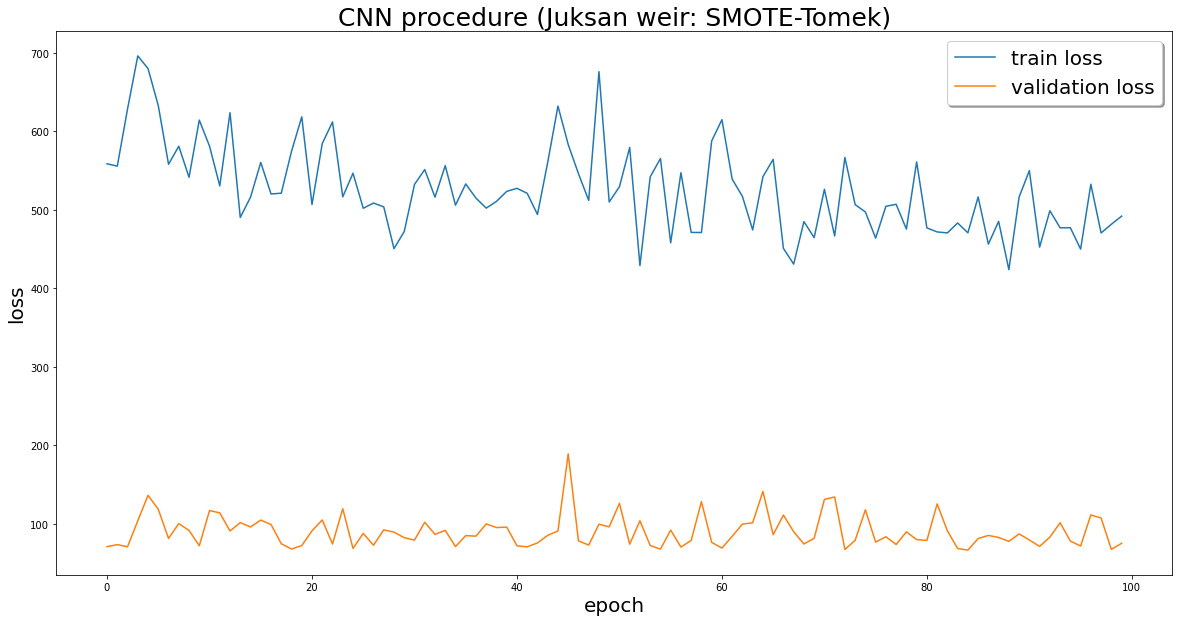

In [160]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Juksan weir: SMOTE-Tomek)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN JS_SMOTE_Tomek_python.png')

In [161]:
JS_test_y = np.array(JS_test_y, dtype=np.float32)

In [162]:
### write data
import pandas as pd

df_JS = pd.DataFrame([JS_test_y, JS_test_y_pred_DNN, JS_test_y_pred_DNN_sm, 
                      JS_test_y_pred_DNN_ads, JS_test_y_pred_DNN_sme, JS_test_y_pred_DNN_smt,
                      JS_test_y_pred_CNN, JS_test_y_pred_CNN_sm, 
                      JS_test_y_pred_CNN_ads, JS_test_y_pred_CNN_sme, JS_test_y_pred_CNN_smt]).T
df_JS.columns = ['Chla', 'DNN', 'DNN_SMOTE', 'DNN_ADASYN', 'DNN_SMOTE_ENN', 'DNN_SMOTE_Tomek',
                 'CNN', 'CNN_SMOTE', 'CNN_ADASYN', 'CNN_SMOTE_ENN', 'CNN_SMOTE_Tomek']
df_JS.to_csv('df_JS_res.csv', index=False, encoding='cp949')